# Home Credit Default Risk (HCDR)

#### Group Members:
- Parth Kapil(pkapil@iu.edu)
- Shiwani Rajagopalan(srajago@iu.edu)
- Shubhangi Mishra(shubmish@iu.edu)
- Suma Priya Davuluri(sdavulu@iu.edu

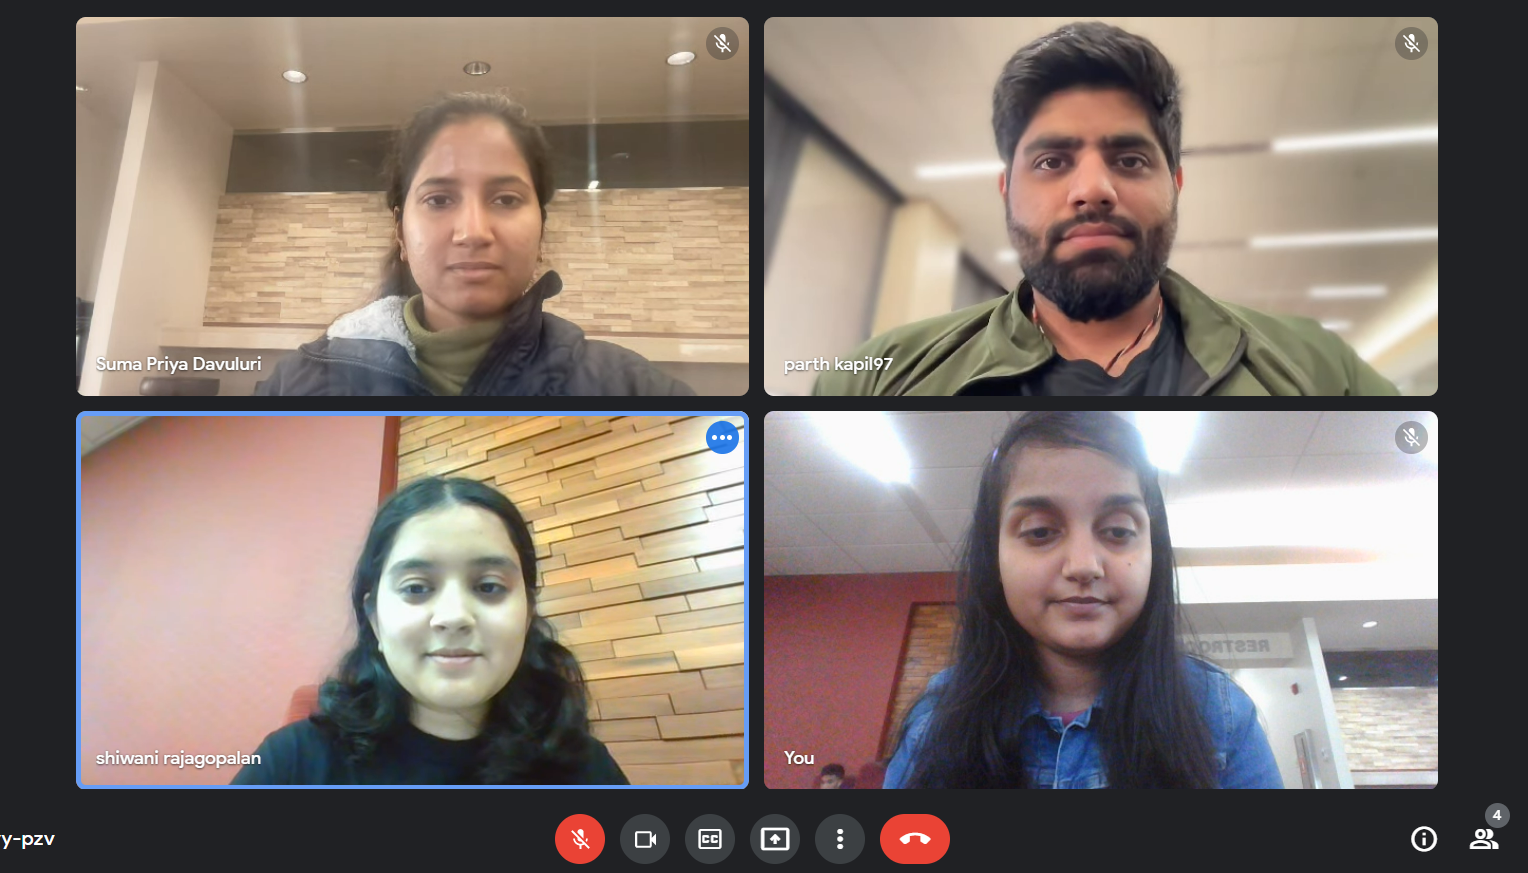

# Abstract

Credit Rating is one of the most important parameter for availing home loan.In our project, we will address all the factors to accurately predict the ability of an applicant to repay loan.

In this phase (Phase1) we are performing exploratory data analysis on the provided csv files in which we have found the missing values present in the data, evaluated the relation(or correlation) between different features and besides finding the outliers which infers about the skewness of the data. For instance we found from the plots(Visual EDA) that most of the customers are laborers and are the one who are defaulting the most as compared to customers with other occupations.

After EDA we have used the application data and merged it with other datasets for building the baseline model. For the baseline model we have used two different algorithms namely Logistic Regression and Naive Bayes. We have used several metrics like Logloss,F1-Score,Precision,ROC-AUC for evaluating the performance of our models.Among these the AUC metric gives an accuracy of 75% for Logistic Regression while 65% for Naive Bayes.AUC is the performance metric of choice setting and our first obtained score serves as a performance benchmark for more advanced modeling approaches in later project phases.

In [1]:
!pip install kaggle

In [2]:
!pwd


/Users/parthkapil/Documents/Masters/Spring 22/AML/misc/Project/HCDR


In [3]:
!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/parthkapil/.kaggle: File exists
cp: /root/shared/Downloads/kaggle.json: No such file or directory
chmod: /Users/parthkapil/.kaggle/kaggle.json: No such file or directory


In [4]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/Users/parthkapil/miniforge3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/parthkapil/miniforge3/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/parthkapil/miniforge3/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/parthkapil/.kaggle. Or use the environment method.


# Dataset Description


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

#### In this project, we will be working on the Home Credit Default Risk dataset which is taken and adapted from the dataset hosted on Kaggle.
#### There are eight important tables (or CSV files) present in the dataset which needs to be used for analysing the results. The tables are as follows:

1. application_{train|test}.csv 
• This is the primary table split into two files for Train (with TARGET) and Test (without TARGET)
• Each row represents a single loan
2. bureau.csv 
• It consists of data concerning the client’s previous credits from other financial institutions. 
• For every loan there are as many rows as the number of credits the client had in the Credit Bureau before the application date.
3. bureau_balance.csv 
• It consists of monthly data about the previous credits in the bureau table.
• Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
4. POS_CASH_balance.csv 
• It consists of monthly data about the previous point of sale. 
• Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
5. credit_card_balance.csv 
• It consists of the monthly data about previous credit cards customers for Home Credit. 
• Each row is one month of a credit card balance, and a single credit card can have multiple rows.
6. previous_application.csv 
• It consists of all previous applications for Home Credit loans for the customers who have loans in the given sample. 
• There is one row for each previous application related to loans in our data sample.
7. installments_payments.csv 
• It consists of the data related to payment history for previous loans at Home Credit. 
• There are two rows one for every payment made while the other for every missed payment.
8. HomeCredit_columns_description.csv 
• This table (or files) contains the description for each column(or feature) present in each of the above-mentioned data files.

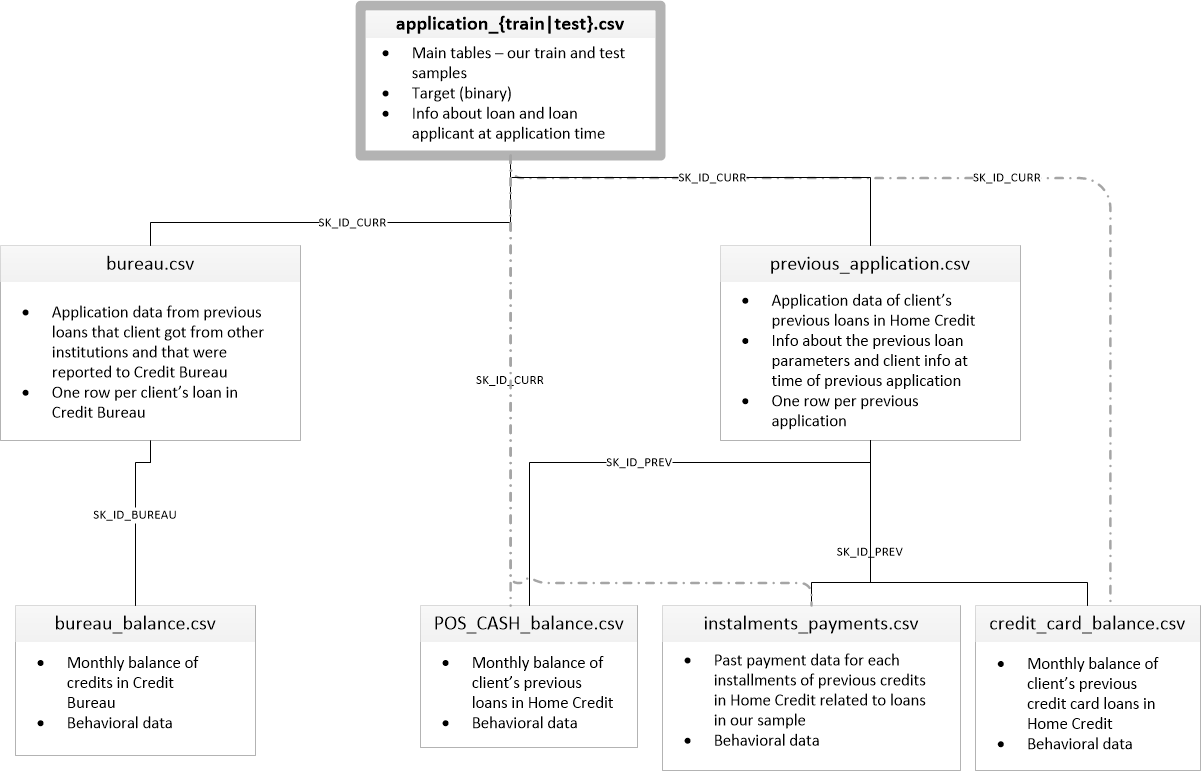

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



!pip install kaggle

!pwd


!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions files home-credit-default-risk

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

# ![alt](home_credit.png "Home credit")

![image.png](attachment:image.png)

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
import gc
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
import gc
warnings.filterwarnings('ignore')

### Helper functions for EDA

In [6]:
#To make it easier to get results quicker we tried to optimize the memory of dataset, for that we are 
# using this amazing solution we found on the kaggle
# https://www.kaggle.com/rinnqd/reduce-memory-usage
def optimize_memory(df):
  
    mem_before = df.memory_usage().sum() / 1024**2
    print("Before Optimization : DataFrame Memory "+ str(mem_before))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                #Check if  Column can be interpreted using int8
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                #Check if  Column can be interpreted using int16
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                #Check if  Column can be interpreted using int32
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                #Use  Int64 if no conditions match
                else:
                    df[col] = df[col].astype(np.int64)  
            else:
                #Check if  Column can be interpreted using Float 16
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                #Check if  Column can be interpreted using float32
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                #Use float64 instead
                else:
                    df[col] = df[col].astype(np.float64)

    mem_after = df.memory_usage().sum() / 1024**2
    print("After Optimization : DataFrame Memory "+ str(mem_after))
    return df


# For one hot encoding categorical features
def ohe(df):
    cat_feature=df.select_dtypes(include='object')
    cat_fetature_cols=cat_feature.columns
    df=pd.get_dummies(df,columns=cat_fetature_cols,dummy_na=False)
    return df

# rename columns in the dataframe
def rename(df,name):
  df.columns=pd.Index([name + "_"+ col for col in list(df.columns)])
  df.rename(columns={name+"_SK_ID_CURR":"SK_ID_CURR"},inplace=True)
 
#function for loading data
def load_csv(path, name):
    df = optimize_memory(pd.read_csv(path))
    print(f"{name}: shape: {df.shape}")
    return df

#function for checking the feature types in the data frame'
def feature_type(data):
    cat_feat = data.select_dtypes(include = ["object"]).columns
    num_feat = data.select_dtypes(exclude = ["object"]).columns
    
    
    print("numerical features:",num_feat)
    print('*'*100)
    print( "categorical features :",cat_feat)
    
    
#finding missing values and their percentage in the dataframe
def missingFeatures(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(15,10))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    #ms= ms[ms["Percent"] > 0]
    return ms

#function for plotting relationship between features
def getRelationship(df,val1='',val2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[val1,val2]].groupby([val1]).count().plot.bar(ax=ax[0],color='red')
    ax[0].set_title('Customer counts Based on '+val1)
    sns.countplot(val1,hue=val2,data=df,ax=ax[1],palette="bright")
    ax[1].set_title(val1+': Unpaid vs Paid')
    plt.xticks(rotation=-90)
    plot=plt.show()
    return plot


## Description about data

In [7]:
#dataset names 
dataset_names = ["POS_CASH_balance", "application_train", "application_test", "bureau", "bureau_balance","credit_card_balance","installments_payments",
            "previous_application"]

In [8]:
#Reading all the data
DATA_DIR = "../Data"
datasets={}  
for name in dataset_names:
    datasets[name] = load_csv(os.path.join(DATA_DIR, f'{name}.csv'), name)

Before Optimization : DataFrame Memory 610.4345703125
After Optimization : DataFrame Memory 238.451078414917
POS_CASH_balance: shape: (10001358, 8)
Before Optimization : DataFrame Memory 286.2270965576172
After Optimization : DataFrame Memory 92.37870502471924
application_train: shape: (307511, 122)
Before Optimization : DataFrame Memory 44.99847412109375
After Optimization : DataFrame Memory 14.596694946289062
application_test: shape: (48744, 121)
Before Optimization : DataFrame Memory 222.62033081054688
After Optimization : DataFrame Memory 112.94713973999023
bureau: shape: (1716428, 17)
Before Optimization : DataFrame Memory 624.845817565918
After Optimization : DataFrame Memory 338.45820713043213
bureau_balance: shape: (27299925, 3)
Before Optimization : DataFrame Memory 673.8829956054688
After Optimization : DataFrame Memory 289.3302688598633
credit_card_balance: shape: (3840312, 23)
Before Optimization : DataFrame Memory 830.4078979492188
After Optimization : DataFrame Memory 311

# Exploratory Data Analysis

### POS_CASH_balance

In [9]:
datasets["POS_CASH_balance"].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07       9975287.0   
mean   1.903217e+06  2.784039e+05   -3.501259e+01             NaN   
std    5.358465e+05  1.027637e+05    2.606657e+01             0.0   
min    1.000001e+06  1.000010e+05   -9.600000e+01             1.0   
25%    1.434405e+06  1.895500e+05   -5.400000e+01            10.0   
50%    1.896565e+06  2.786540e+05   -2.800000e+01            12.0   
75%    2.368963e+06  3.674290e+05   -1.300000e+01            24.0   
max    2.843499e+06  4.562550e+05   -1.000000e+00            92.0   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count              9975271.0  1.000136e+07  1.000136e+07  
mean                     NaN  1.160693e+01  6.544684e-01  
std                      0.0  1.327140e+02  3.276249e+01  
min                      0.0  0.000000e+00  0.000000e+00  
25%                      3.0  0.000000e+00  0.000000e+00  
50%                      7.0  0.000000e+00  0.000000e+00  
75%                     14.0  0.000000e+00  0.000000e+00  
max                     85.0  4.231000e+03  3.595000e+03

##### Grouping featrues by type

In [10]:
feature_type(datasets["POS_CASH_balance"])

numerical features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')
****************************************************************************************************
categorical features : Index(['NAME_CONTRACT_STATUS'], dtype='object')


Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675

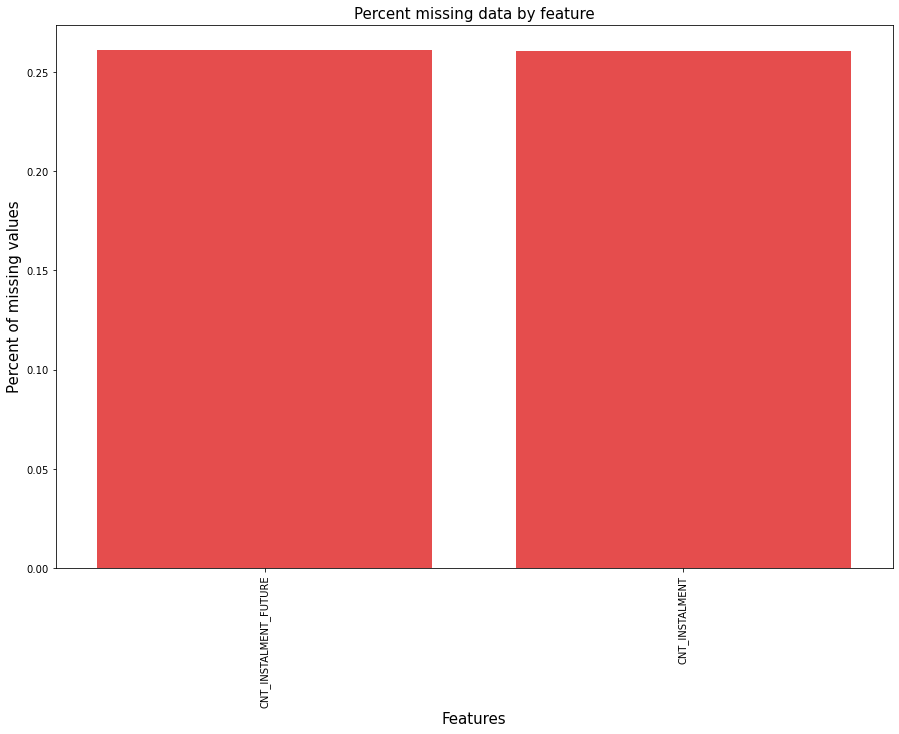

In [11]:
missingFeatures(datasets["POS_CASH_balance"])

##### Realtionship between cash balance with months balance

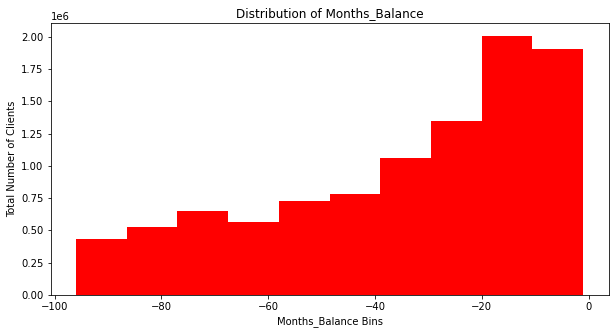

In [12]:
plt.figure(figsize=(10,5))
plt.hist(datasets['POS_CASH_balance'][['MONTHS_BALANCE']].values, bins=10,color='red',label=True)
plt.title('Distribution of Months_Balance')
plt.xlabel('Months_Balance Bins')
plt.ylabel('Total Number of Clients')
plt.show()

###### Observation

Most of the customers have non zero month balance.

#### Customer counts on the baiss of Instalment counts

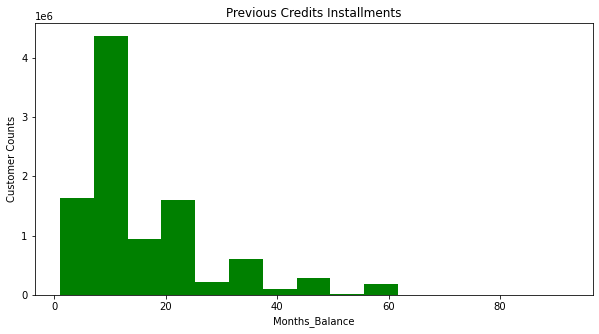

In [13]:
plt.figure(figsize=(10,5))
plt.hist(datasets['POS_CASH_balance'][['CNT_INSTALMENT']].values, bins=15,color='green',label=True)
plt.title('Previous Credits Installments')
plt.xlabel('Months_Balance')
plt.ylabel('Customer Counts')
plt.show()

##### Observation


Most of the customers with previous credit installments have positive month balance.


## application_train EDA

In [14]:
datasets['application_train'].describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990259e+05   27108.572266     5.383961e+05   
std    4.024908e+05   14493.737305     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.000000  -16036.995067   63815.045904  ...   
std                      0.000000    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010010  -19682.000000   -2760.000000  ...   
50%                      0.018845  -15750.000000   -1213.000000  ...   
75%                      0.028656  -12413.000000    -289.000000  ...   
max                      0.072510   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                    265992.0                   265992.0   
mean                          0.0                        0.0   
std                           0.0                        0.0   
min                           0.0                        0.0   
25%                           0.0                        0.0   
50%                           0.0                        0.0   
75%                           0.0                        0.0   
max                           4.0                        9.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                    265992.0                   265992.0   
mean                          0.0                        NaN   
std                           0.0                        0.0   
min                           0.0                        0.0   
25%                           0.0                        0.0   
50%                           0.0                        0.0   
75%                           0.0                        0.0   
max                           8.0                       27.0   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                   265992.0                    265992.0  
mean                         NaN                         NaN  
std                          NaN                         0.0  
min                          0.0                         0.0  
25%              

##### Grouping featrues by type

In [15]:
feature_type(datasets["application_train"])

numerical features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)
****************************************************************************************************
categorical features : Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLS

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
...                          ...        ...
EXT_SOURCE_2                 660   0.214626
AMT_GOODS_PRICE              278   0.090403
AMT_ANNUITY                   12   0.003902
CNT_FAM_MEMBERS                2   0.000650
DAYS_LAST_PHONE_CHANGE         1   0.000325

[67 rows x 2 columns]

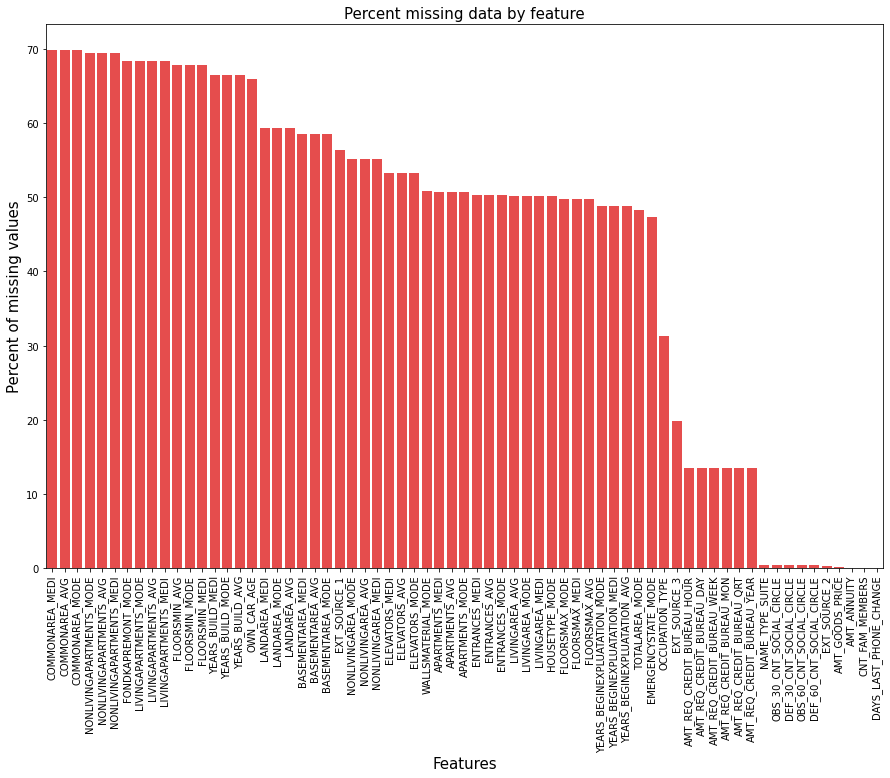

In [16]:
missingFeatures(datasets["application_train"])

In [17]:
# Missing value in dataframe
missing_vals = (datasets['application_train'].isna().sum())

print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())

Missing values in dataframe  67


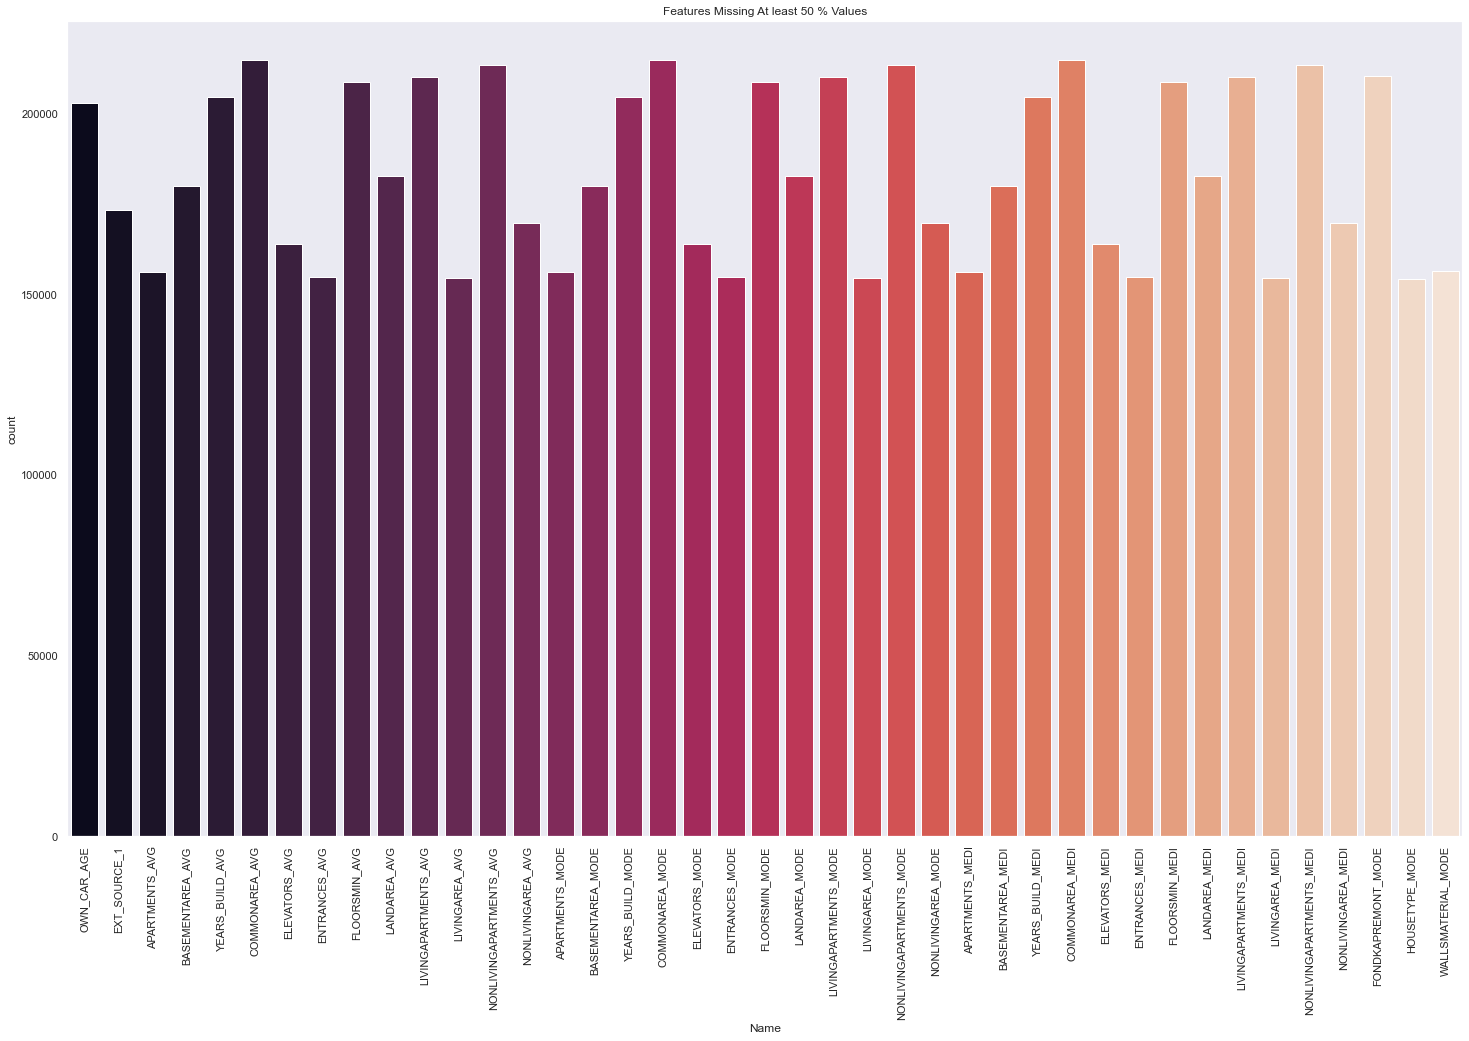

In [18]:
missing_vals = pd.DataFrame(missing_vals)
missing_vals.columns = ['count']
missing_vals.index.names = ['Name']
missing_vals['Name'] = missing_vals.index

sns.set(style="dark", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=missing_vals[missing_vals['count']>len(datasets['application_train'])/2], palette="rocket").set(title='Features Missing At least 50 % Values')
plt.xticks(rotation = 90)
plt.show()

##### Observation

About 67 features in application train have missing data. Among those features most of them have more than 50% missing data.

## Lets have a look at relationship between features and Target features

#### Relationship between NAME_EDUCATION_TYPE with Target

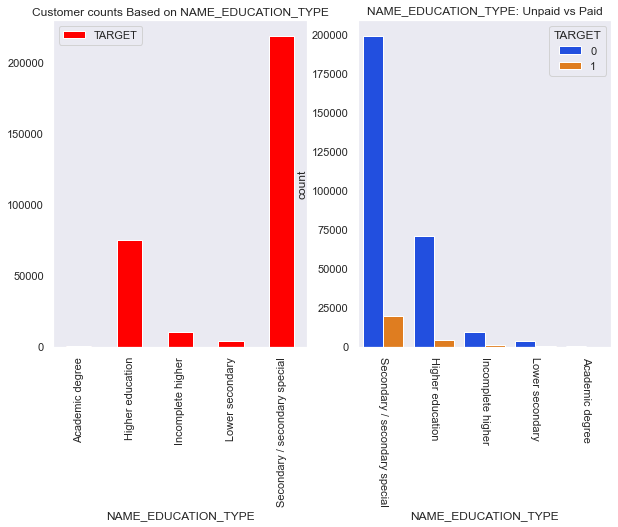

In [19]:
getRelationship(datasets['application_train'],'NAME_EDUCATION_TYPE','TARGET')

##### Observation

This is evidant from the plot that a customers with Secondary/Secondary special had a high rate of not paying back as compared with customers with other education types

#### Relationship between Gender with Target

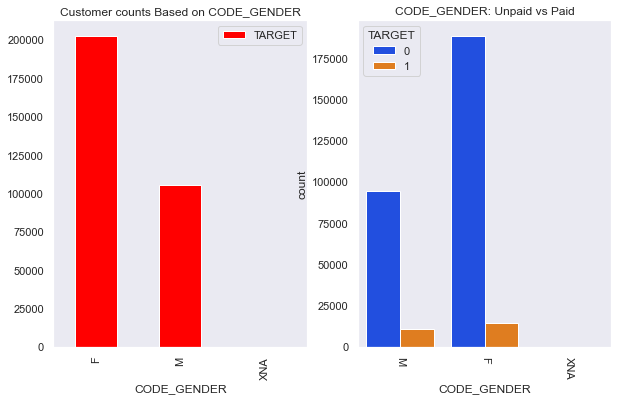

In [20]:
getRelationship(datasets['application_train'],'CODE_GENDER','TARGET')

##### Observation

From the plot, we can see that most of the customers are Females and that is the reason they are defaulting more on paying back than males.

#### Relationship between Customer income with Target

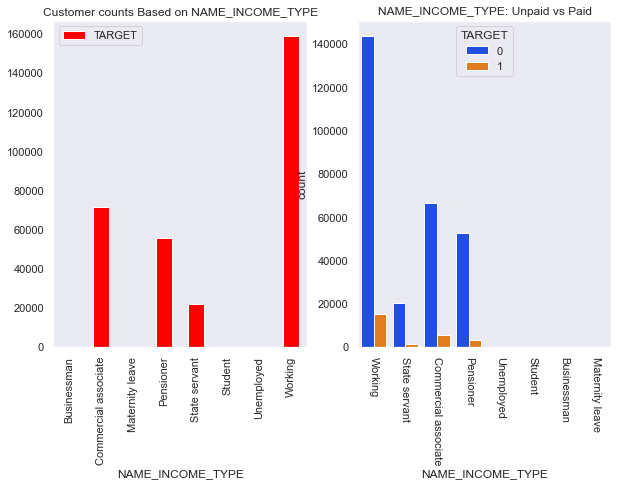

In [21]:
getRelationship(datasets['application_train'],'NAME_INCOME_TYPE','TARGET')

##### Observation

From the plot, we can see that most of the customers are working and still they are defaulting on paying back. Let's drill more on this and check why is that.

#### Relationship between Customer Occupation with Target

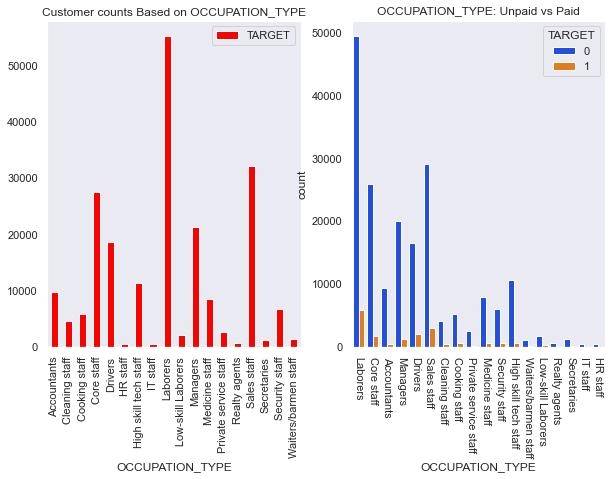

In [22]:
getRelationship(datasets['application_train'],'OCCUPATION_TYPE','TARGET')

##### Observation

From the plot, we can see that most of the customers are laborers and they are the customers who are defaulting the most as compared to customers with other occupations. This makes sense because laborers don't make that much money and may be thats the reason thety are defaulting more.

#### Relationship between Customer Family Status with Target

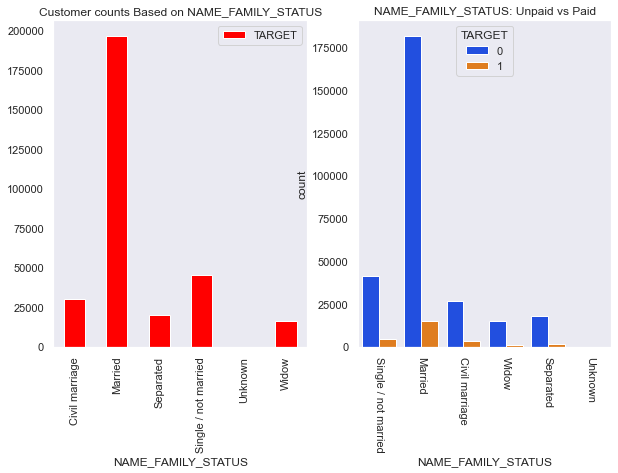

In [23]:
getRelationship(datasets['application_train'],'NAME_FAMILY_STATUS','TARGET')

##### Observation

From the plot, we can see that most of the customers are married. Customers who are marrid have the highest rate of defaulting as compared to other customers with differnt family status.

#### Relationship between Customer Owning a car with Target

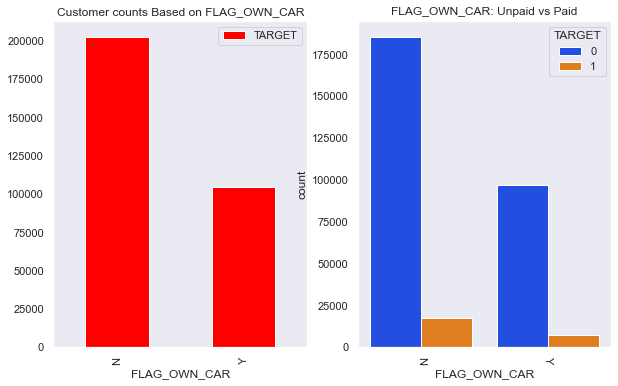

In [24]:
getRelationship(datasets['application_train'],'FLAG_OWN_CAR','TARGET')

##### Observation

Most of the vcustomers don't own a car and that is also the chunk of customers which is not paying back.

#### Relationship between Customer contract type with Target

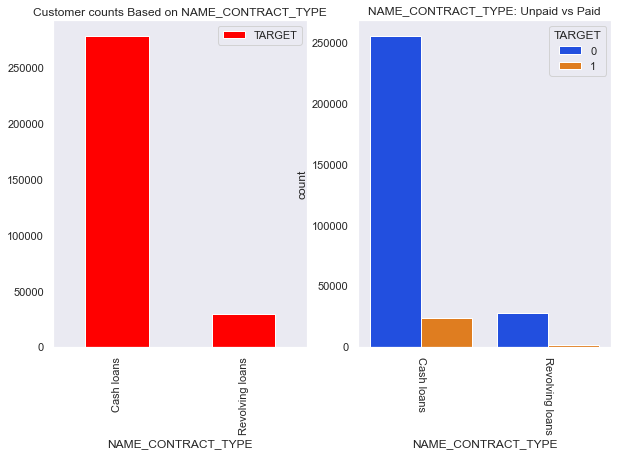

In [25]:
getRelationship(datasets['application_train'],'NAME_CONTRACT_TYPE','TARGET')

##### Observation

Most of the customers took cash loans. Customers with cash loans defaulted more on the loan as compared to customers with recieving loan contract ype.

#### Relationship between Customer House type with Target

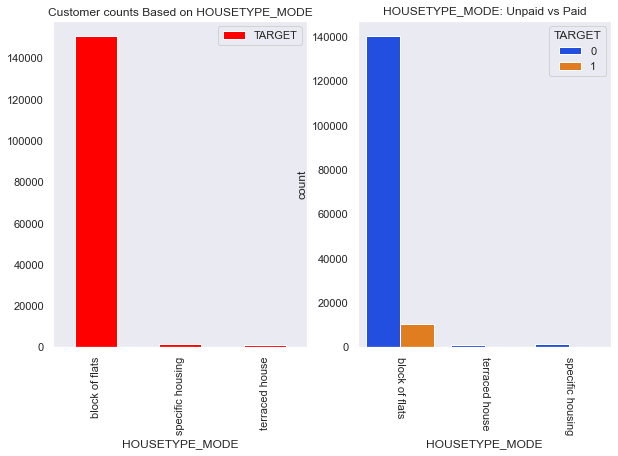

In [26]:
getRelationship(datasets['application_train'],'HOUSETYPE_MODE','TARGET')

##### Observation

From the plot it is clear that the data is highly skewed towards customers with block of flats.

#### Client Age Distribution 

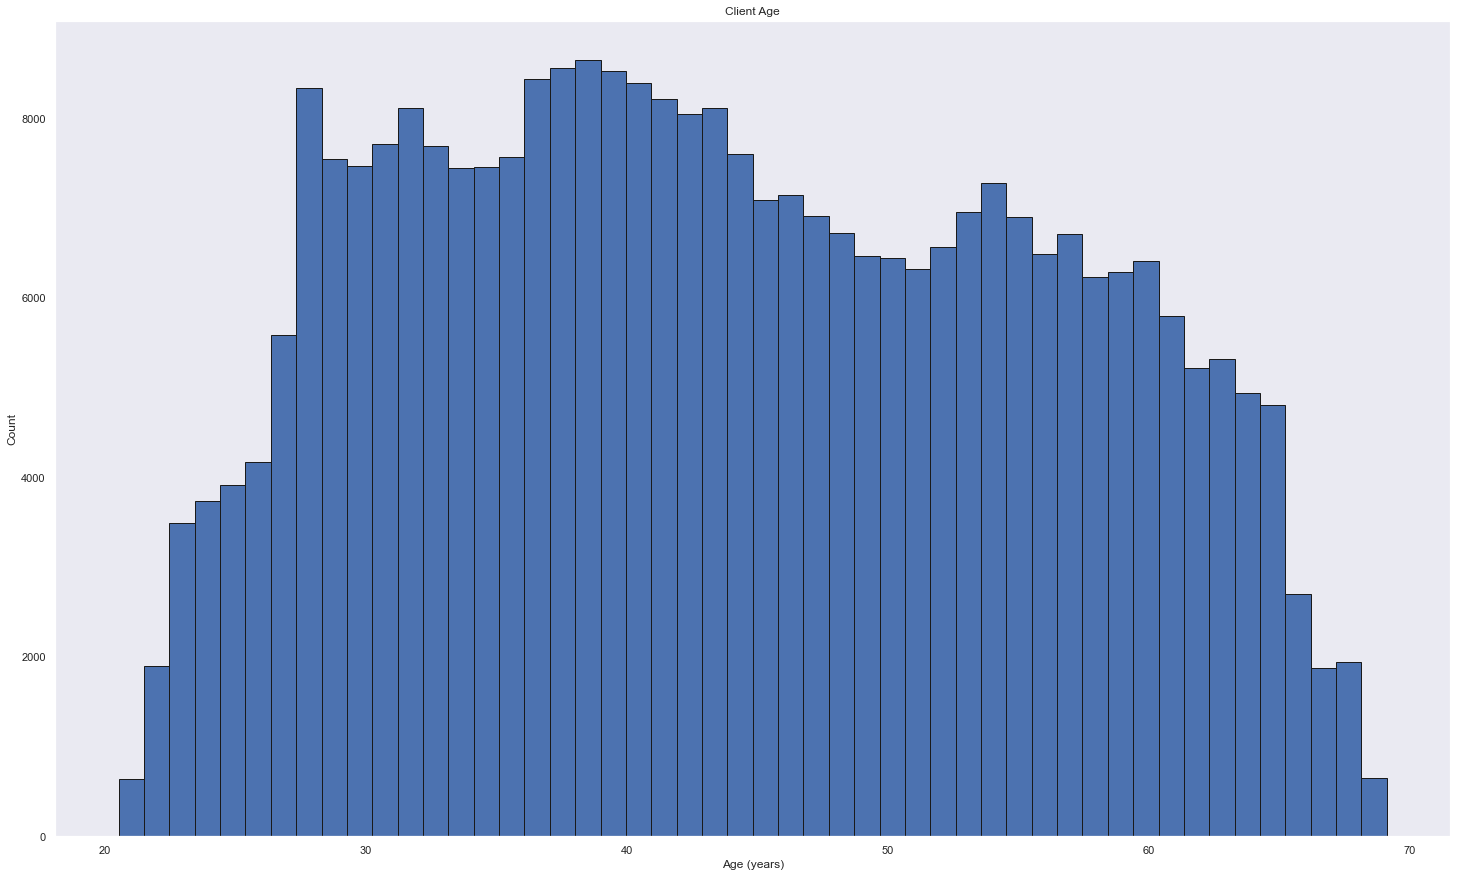

In [27]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] /-365, edgecolor = 'k', bins = 50)
plt.title('Client Age'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

##### Observation

Most of the customers are between the ages 30-60

## Bureau EDA 

In [28]:
datasets['bureau'].describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count            1610875.0          1082775.0            5.919400e+05   
mean                   NaN                NaN            3.825417e+03   
std                    NaN                NaN            2.060316e+05   
min               -42048.0           -42016.0            0.000000e+00   
25%                -1138.0            -1489.0            0.000000e+00   
50%                 -330.0             -897.0            0.000000e+00   
75%                  474.0             -425.0            0.000000e+00   
max                31200.0                0.0            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229514e+03            3.791277e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

##### Grouping featrues by type

In [29]:
feature_type(datasets["bureau"])

numerical features: Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')
****************************************************************************************************
categorical features : Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')


In [30]:
# Missing value in dataframe
missing_vals = (datasets['bureau'].isna().sum())

print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())

Missing values in dataframe  7


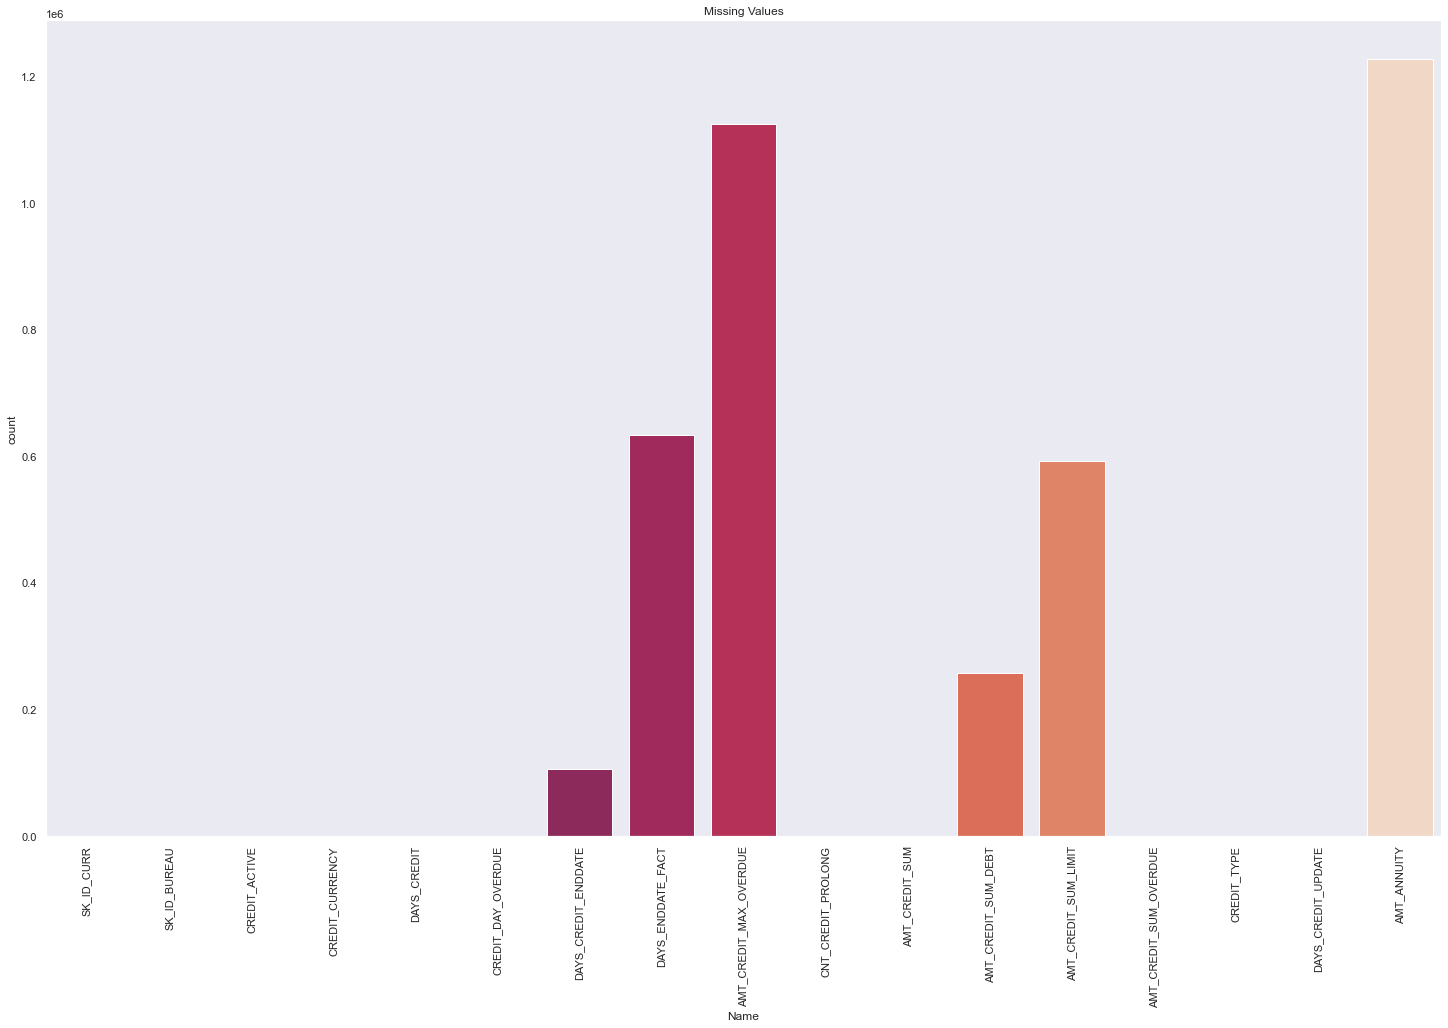

In [31]:
missing_vals = pd.DataFrame(missing_vals)
missing_vals.columns = ['count']
missing_vals.index.names = ['Name']
missing_vals['Name'] = missing_vals.index

sns.set(style="dark", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=missing_vals, palette="rocket").set(title='Missing Values')
plt.xticks(rotation = 90)
plt.show()

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757

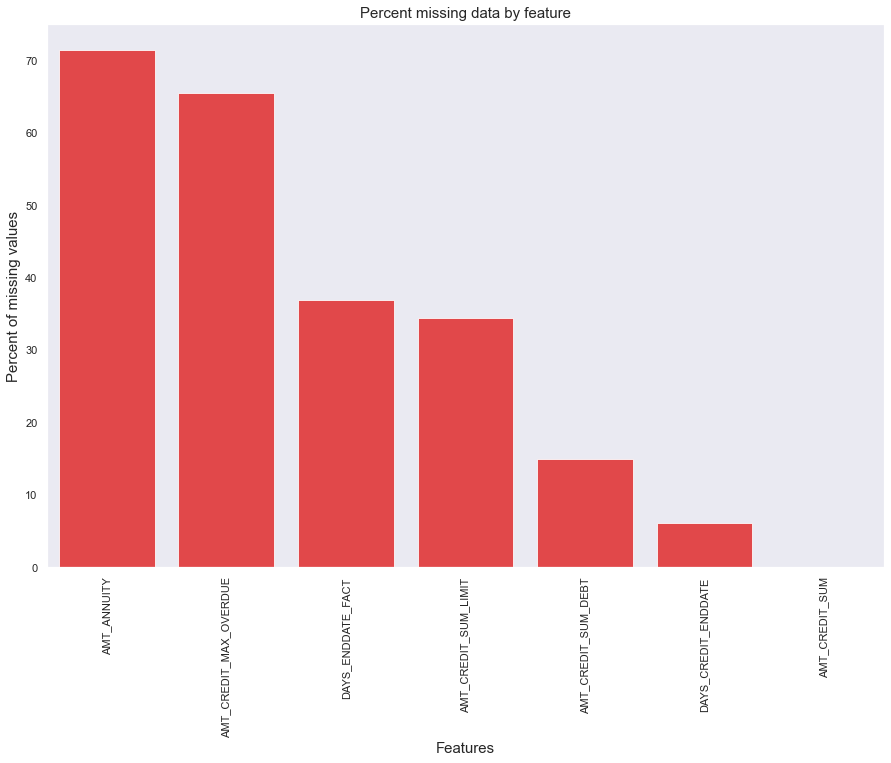

In [32]:
missingFeatures(datasets["bureau"])

Observations

7 features in Bureau are missing values 4 of them have more than 30% missing data.


##### CREDIT TYPE Analysis

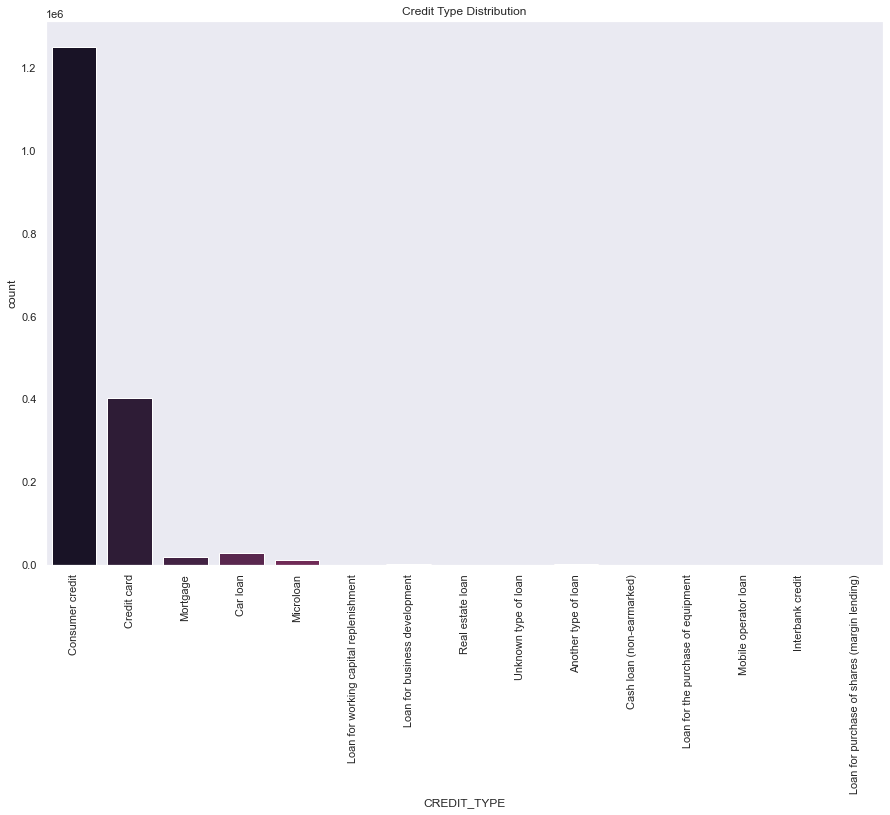

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(x='CREDIT_TYPE', data=datasets["bureau"], palette="rocket");
plt.title('Credit Type Distribution');
plt.xticks(rotation=90);
plt.show()

#### Observation

Majority of the customers have Consumer Credits

### Credit Active analysis

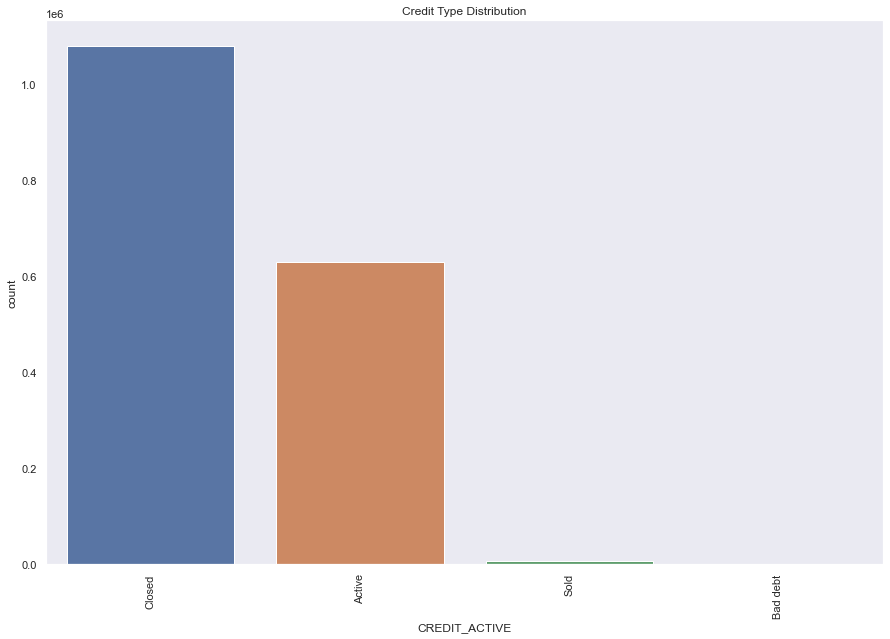

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x='CREDIT_ACTIVE', data=datasets["bureau"]);
plt.title('Credit Type Distribution');
plt.xticks(rotation=90);
plt.show()

##### Observation

Majority of the custormers have Closed credit. There is no customer with bad debt

# Bureau Balance EDA

In [35]:
datasets['bureau_balance'].describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

##### Grouping featrues by type

In [36]:
feature_type(datasets["bureau_balance"])

numerical features: Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')
****************************************************************************************************
categorical features : Index(['STATUS'], dtype='object')


In [37]:
# Missing value in dataframe
missing_vals = (datasets['bureau_balance'].isna().sum())

print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())

Missing values in dataframe  0


# Previous Application EDA

In [38]:
datasets['previous_application'].describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180582e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697401e+03     2.278472e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.000000   
std               3.334028e+00            5.932963e-02           0.000000   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108887   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.774902  -8.806797e+02      3.139511e+02   
std    ...                  0.100708   7.790997e+02      7.127443e+03   
min    ...                  0.373047  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715820  -1.300000e+03     -1.000000e+00   
50%    ...                  0.834961  -5.810000e+02      3.000000e+00   
75%    ...                  0.852539  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

       CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count    1297984.0       997149.000000   997149.000000   
mean           NaN       342209.781250    13826.266602   
std            0.0        88916.117188    72444.867188   
min            0.0        -2922.000000    -2892.000000   
25%            6.0       365243.000000    -1628.000000   
50%           12.0       365243.000000     -831.000000   
75%           24.0       365243.000000     -411.000000   
max           84.0       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000   997149.00000     997149.000000   
mean                33767.769531    76582.40625      81992.343750   
std                106857.031250   149647.40625     153303.515625   
min                 -2801.000000    -2889.00000      -2874.000000   
25%                 -1242.000000    -1314.00000      -1270.000000   
50%                  -361.000000     -537.00000       -499.000000   
75%                   129.000000      -74.00000        -44.000000   
max                365243.000000   365243.00000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count                   997149.0  
mean                         NaN  
std                          0.0  
min                          0.0  
25%                          0.0  
50%                          0.0  
75%                          1.0  
max                          1.0  

[8 rows x 21 columns]

##### Grouping featrues by type

In [39]:
feature_type(datasets["previous_application"])

numerical features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
****************************************************************************************************
categorical features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_

In [40]:
# Missing value in dataframe
missing_vals = (datasets['previous_application'].isna().sum())
print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())

Missing values in dataframe  16


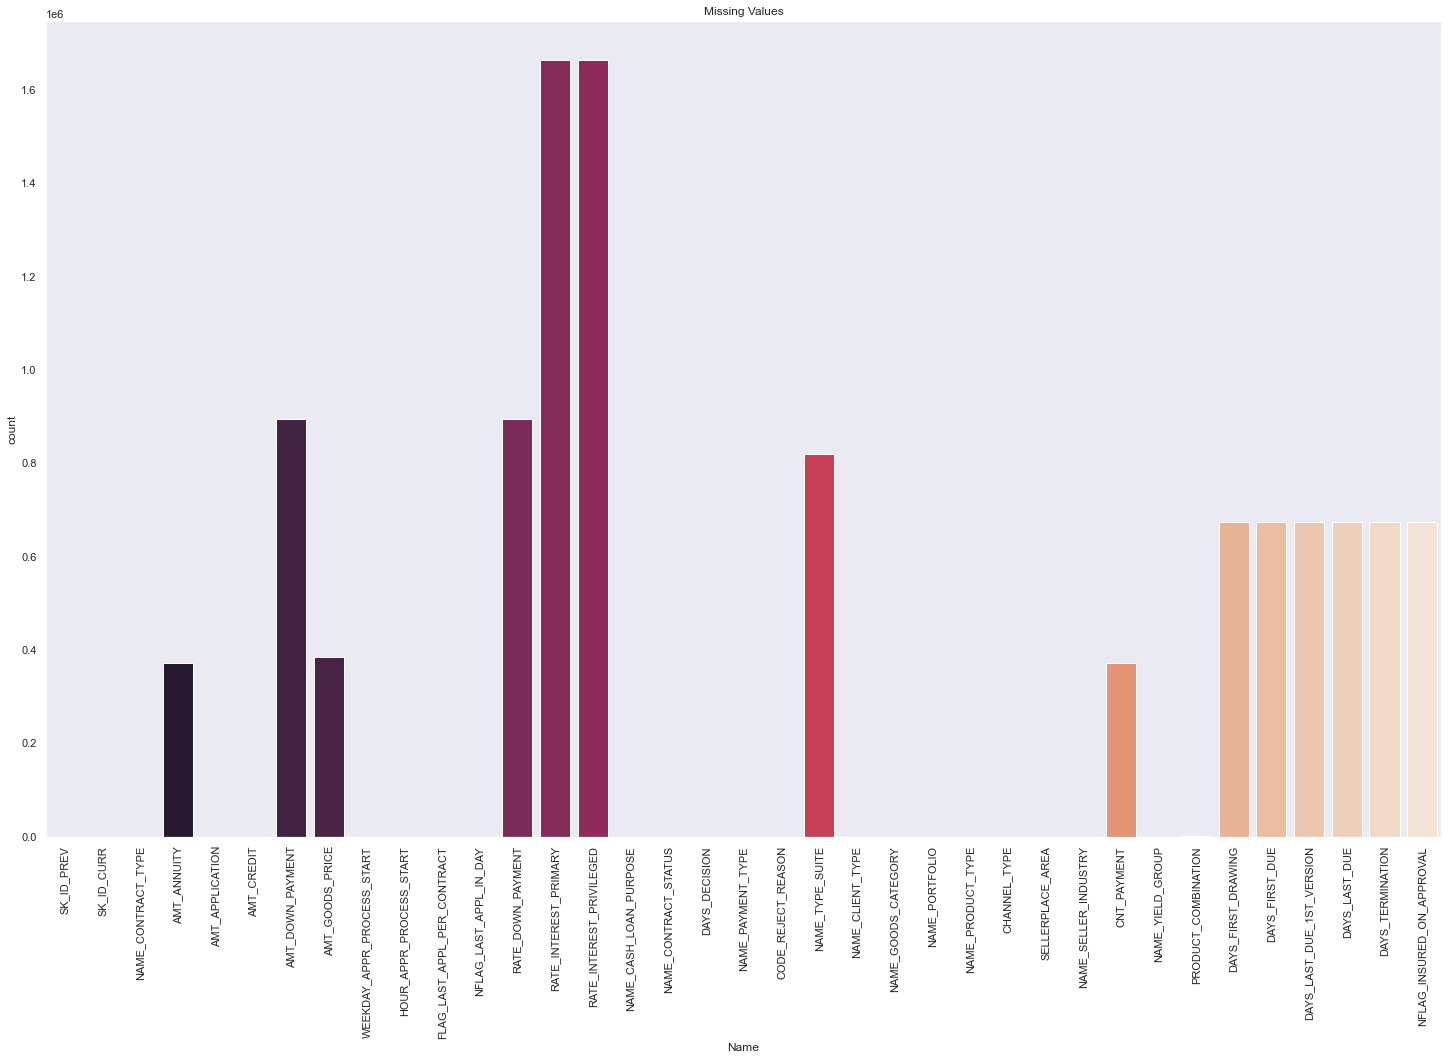

In [41]:
missing_vals = pd.DataFrame(missing_vals)
missing_vals.columns = ['count']
missing_vals.index.names = ['Name']
missing_vals['Name'] = missing_vals.index

sns.set(style="dark", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=missing_vals, palette="rocket").set(title='Missing Values')
plt.xticks(rotation = 90)
plt.show()

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716
AMT_CREDIT                       1   0.000060

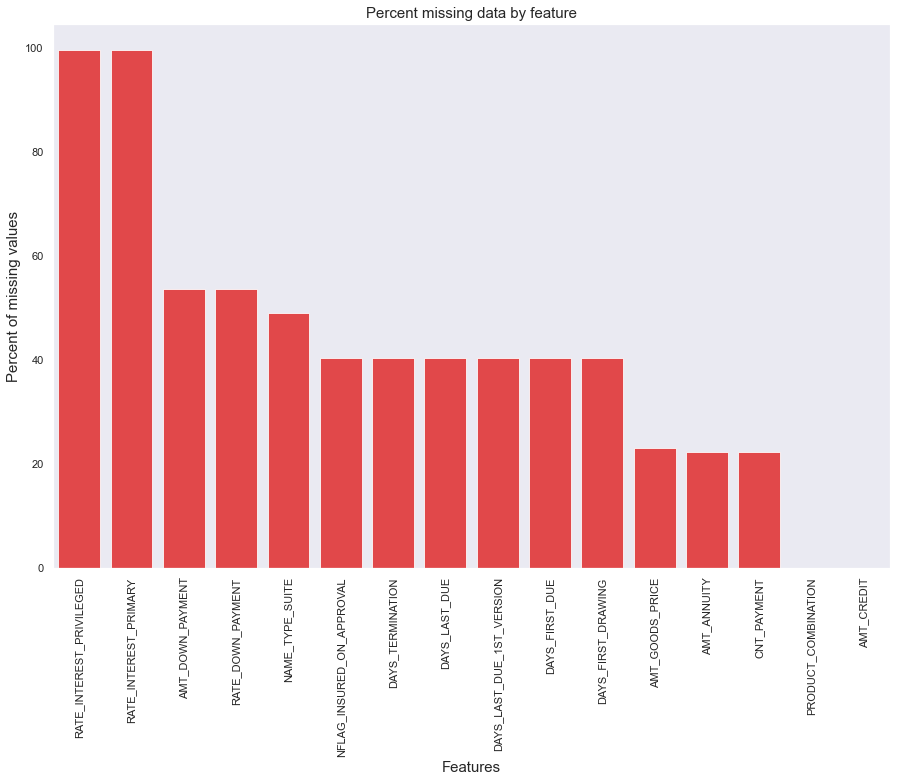

In [42]:
missingFeatures(datasets["previous_application"])

##### Observation

16 features have missing values. RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY have 99% missing data. These features are almost of no use to us. Other than these 2 features, 9 features have more than 40% missing data.

### previous_application Analysis

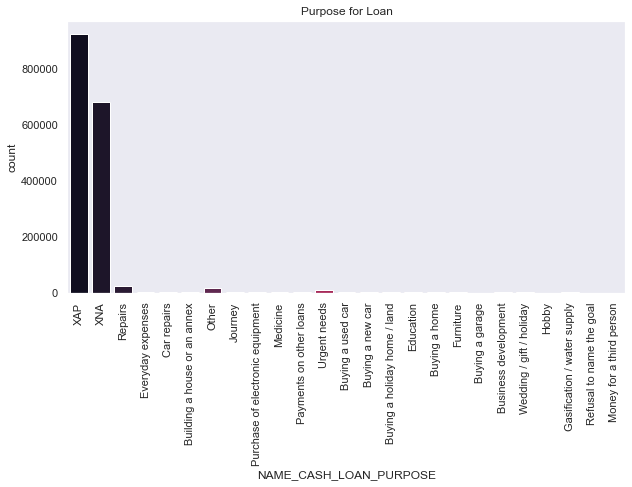

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=datasets["previous_application"], palette="rocket");
plt.title('Purpose for Loan');
plt.xticks(rotation=90);
plt.show()

##### Observation

Almost all the customers took loans for 2 use cases (XAP & XNA)

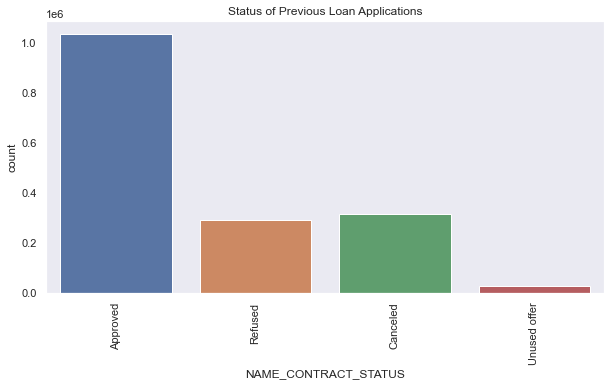

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_CONTRACT_STATUS', data=datasets["previous_application"]);
plt.title('Status of Previous Loan Applications');
plt.xticks(rotation=90);
plt.show()

##### Observation

Most of the customer's previous applications were approved.

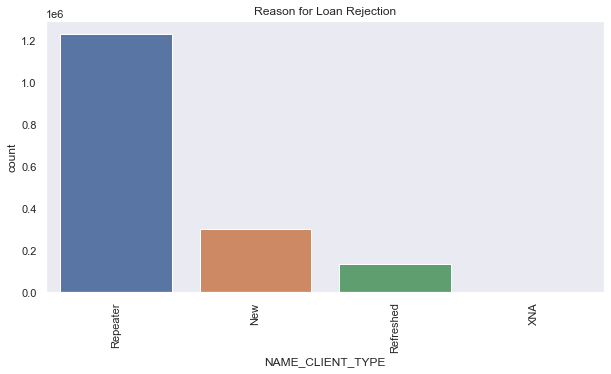

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_CLIENT_TYPE', data=datasets["previous_application"]);
plt.title('Reason for Loan Rejection');
plt.xticks(rotation=90);
plt.show()

##### Observation

Customers who were repeaters, got their application rejected the most.

# CREDIT CARD BALANCE EDA

In [46]:
datasets['credit_card_balance'].describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961323e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433390e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
count              3.090496e+06             3.535076e+06  ...   
mean               2.968804e+03             3.540206e+03  ...   
std                2.079689e+04             5.600154e+03  ...   
min                0.000000e+00             0.000000e+00  ...   
25%                0.000000e+00             0.000000e+00  ...   
50%                0.000000e+00             0.000000e+00  ...   
75%                0.000000e+00             6.633911e+03  ...   
max                2.239274e+06             2.028820e+05  ...   

       AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
count              3.840312e+06   3.840312e+06          3.840312e+06   
mean               5.596585e+04   5.808884e+04          5.809825e+04   
std                1.025336e+05   1.059654e+05          1.059718e+05   
min               -4.233058e+05  -4.202502e+05         -4.202502e+05   
25%                0.000000e+00   0.000000e+00          0.000000e+00   
50%                0.000000e+00   0.000000e+00          0.000000e+00   
75%                8.535924e+04   8.889949e+04          8.891451e+04   
max                1.472317e+06   1.493338e+06          1.493338e+06   

       CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count                 3090496.0          3.840312e+06   
mean                        NaN          7.031439e-01   
std                         0.0          3.190347e+00   
min                         0.0          0.000000e+00   
25%                         0.0          0.000000e+00   
50%                         0.0          0.000000e+00   
75%                         0.0          0.000000e+00   
max                        51.0          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                   3090496.0                 3090496.0   
mean                          0.0                       NaN   
std                           0.0                       0.0   
min                           0.0                       0.0   
25%                           0.0                       0.0   
50%                           0.0                       0.0   
75%                           0.0                       0.0   
max                          12.0                     165.0   

       CNT_INST

##### Grouping featrues by type

In [47]:
feature_type(datasets["credit_card_balance"])

numerical features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')
****************************************************************************************************
categorical features : Index(['NAME_CONTRACT_STATUS'], dtype='object')


In [48]:
# Missing value in dataframe
missing_vals = (datasets['credit_card_balance'].isna().sum())
print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())


Missing values in dataframe  9


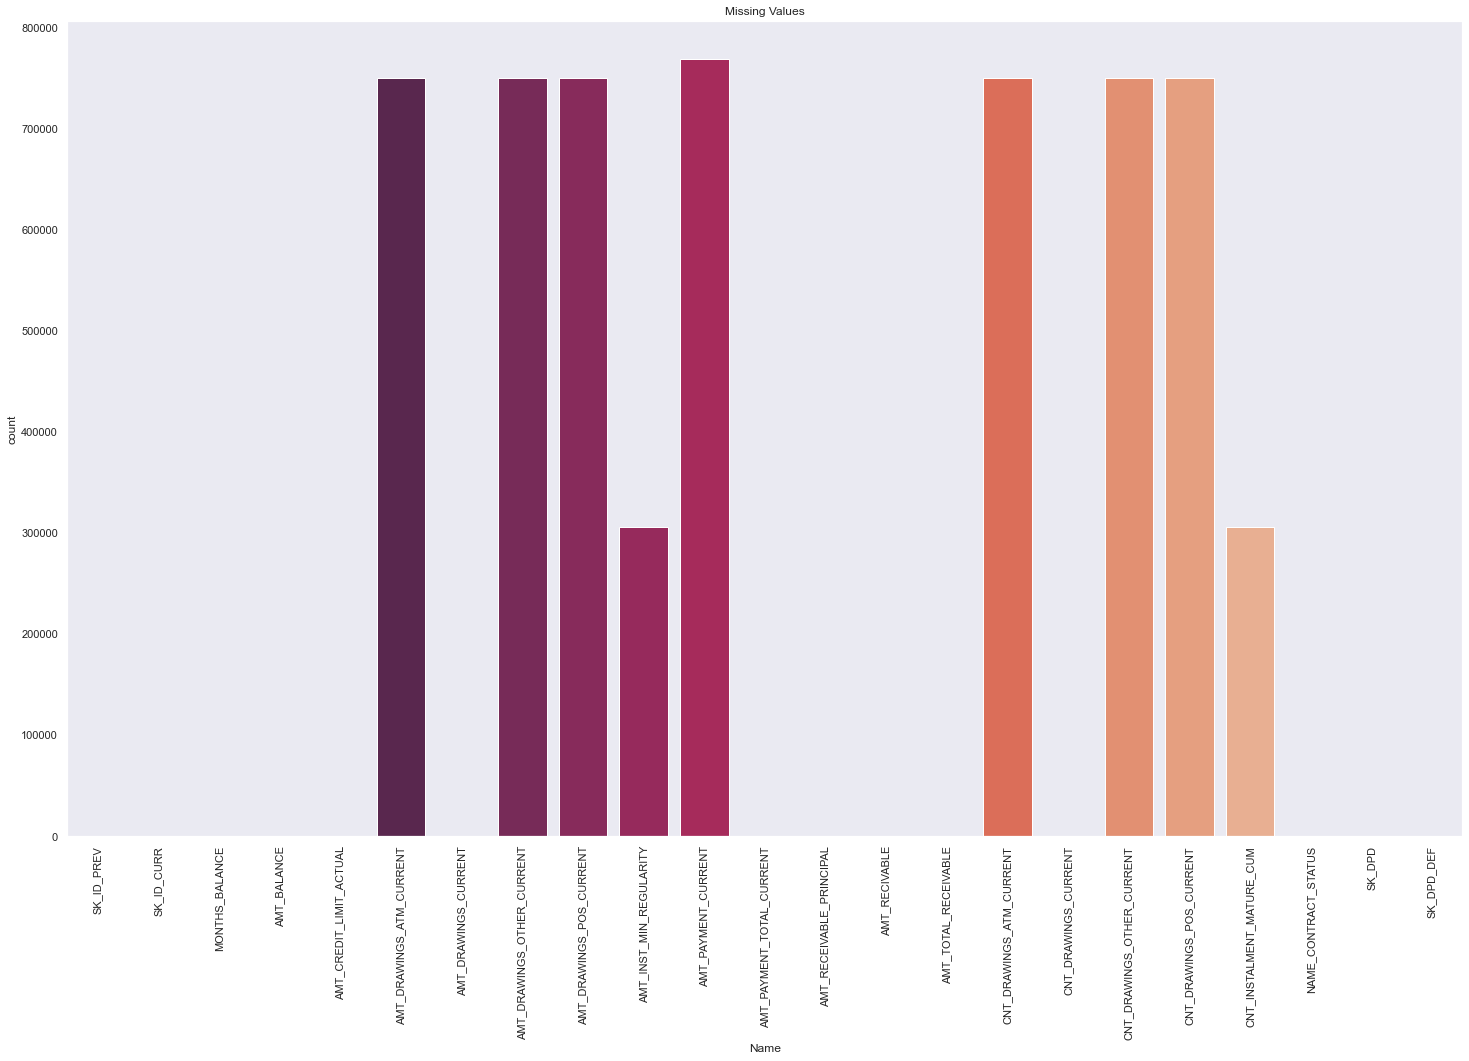

In [49]:
missing_vals = pd.DataFrame(missing_vals)
missing_vals.columns = ['count']
missing_vals.index.names = ['Name']
missing_vals['Name'] = missing_vals.index

sns.set(style="dark", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=missing_vals, palette="rocket").set(title='Missing Values')
plt.xticks(rotation = 90)
plt.show()

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208

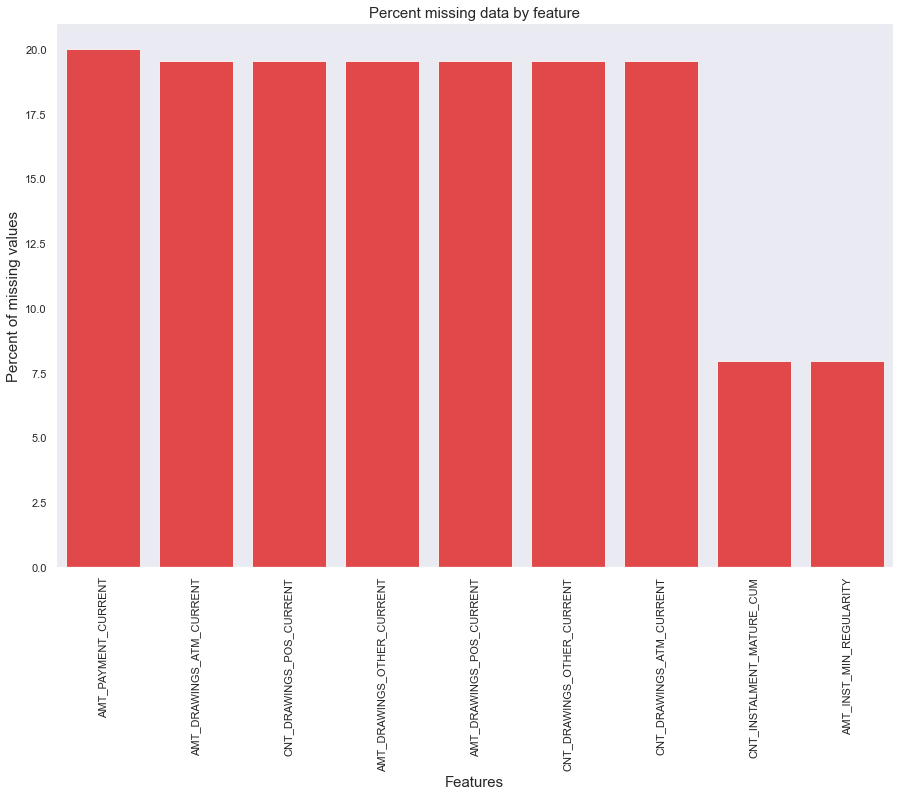

In [50]:
missingFeatures(datasets["credit_card_balance"])

##### Observation

9 features have missing data with most of them having more than 19% missing data.

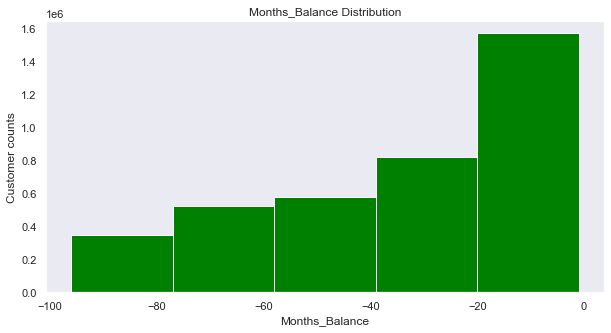

In [51]:
plt.figure(figsize=(10,5))
plt.hist(datasets['credit_card_balance'][['MONTHS_BALANCE']].values, bins=5,color='green',label=True)
plt.title('Months_Balance Distribution')
plt.xlabel('Months_Balance')
plt.ylabel('Customer counts')
plt.show()

#### Observation

Majority of customers have negative month balance

# Installment Payments EDA

In [52]:
datasets['installments_payments'].describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07              13605401.0   
mean   1.903365e+06  2.784449e+05                     NaN   
std    5.362029e+05  1.027183e+05                     0.0   
min    1.000001e+06  1.000010e+05                     0.0   
25%    1.434191e+06  1.896390e+05                     0.0   
50%    1.896520e+06  2.786850e+05                     1.0   
75%    2.369094e+06  3.675300e+05                     1.0   
max    2.843499e+06  4.562550e+05                   178.0   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07       13605401.0          13602496.0   
mean            1.887090e+01              NaN                 NaN   
std             2.666407e+01              NaN                 NaN   
min             1.000000e+00          -2922.0             -4920.0   
25%             4.000000e+00          -1654.0             -1662.0   
50%             8.000000e+00           -818.0              -827.0   
75%             1.900000e+01           -361.0              -370.0   
max             2.770000e+02             -1.0                -1.0   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705092e+04  1.723821e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

##### Grouping featrues by type

In [53]:
feature_type(datasets["installments_payments"])

numerical features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')
****************************************************************************************************
categorical features : Index([], dtype='object')


In [54]:
# Missing value in dataframe
missing_vals = (datasets['installments_payments'].isna().sum())
print('Missing values in dataframe ',missing_vals[missing_vals > 0].count())


Missing values in dataframe  2


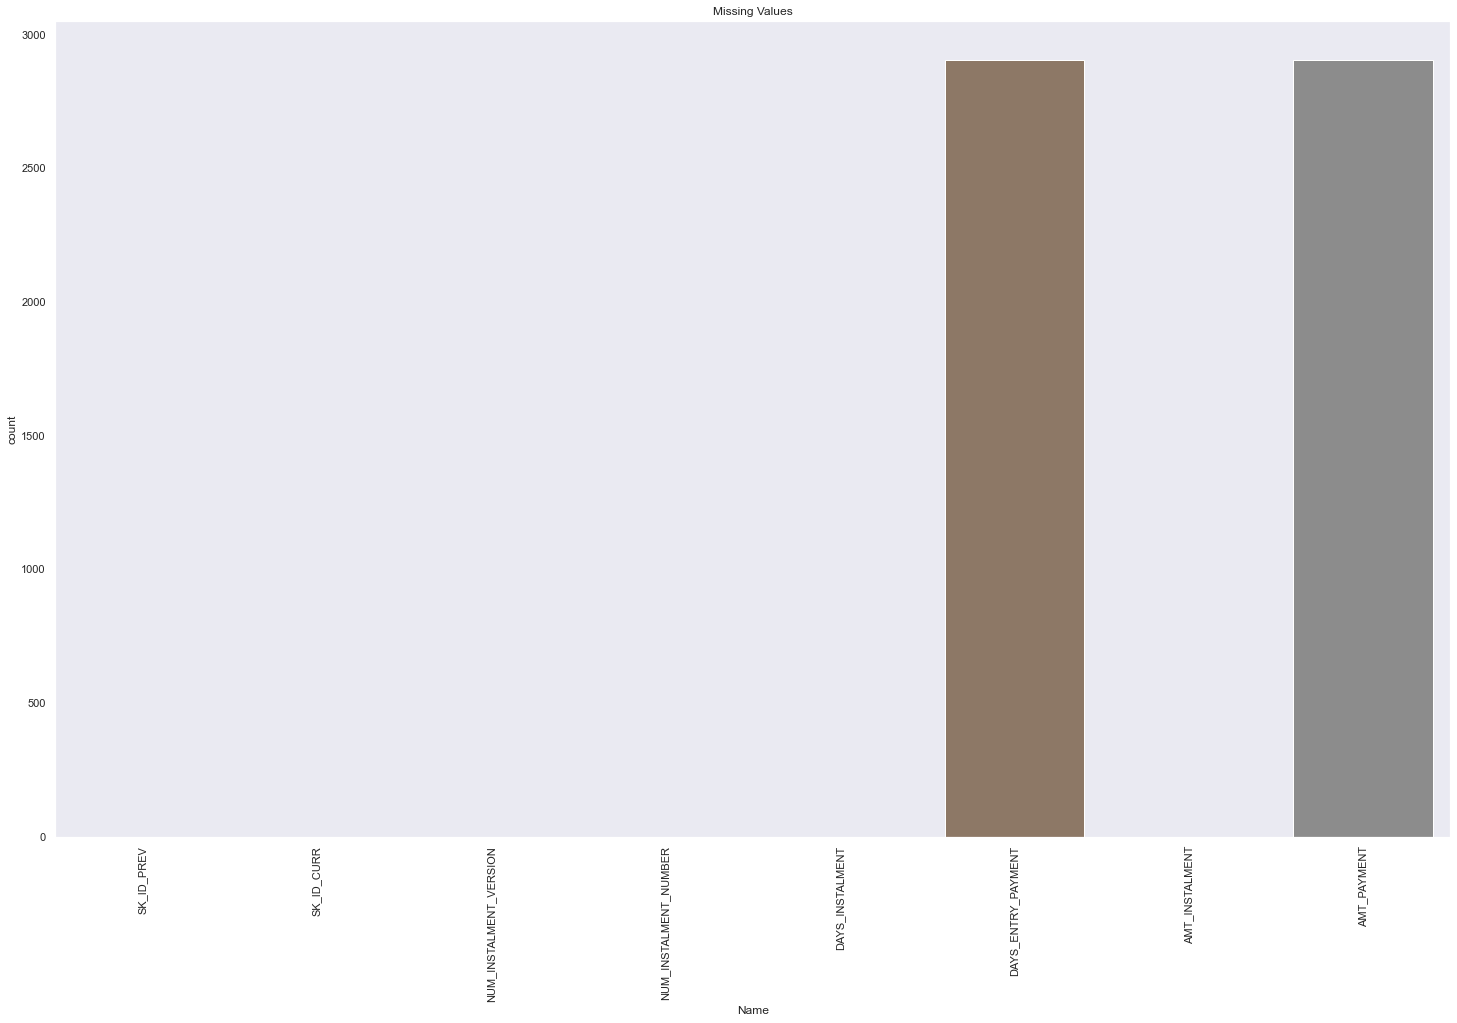

In [55]:
missing_vals = pd.DataFrame(missing_vals)
missing_vals.columns = ['count']
missing_vals.index.names = ['Name']
missing_vals['Name'] = missing_vals.index

sns.set(style="dark", color_codes=True,rc={'figure.figsize':(25,15)})
sns.barplot(x = 'Name', y = 'count', data=missing_vals).set(title='Missing Values')
plt.xticks(rotation = 90)
plt.show()


Total   Percent
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_PAYMENT          2905  0.021352

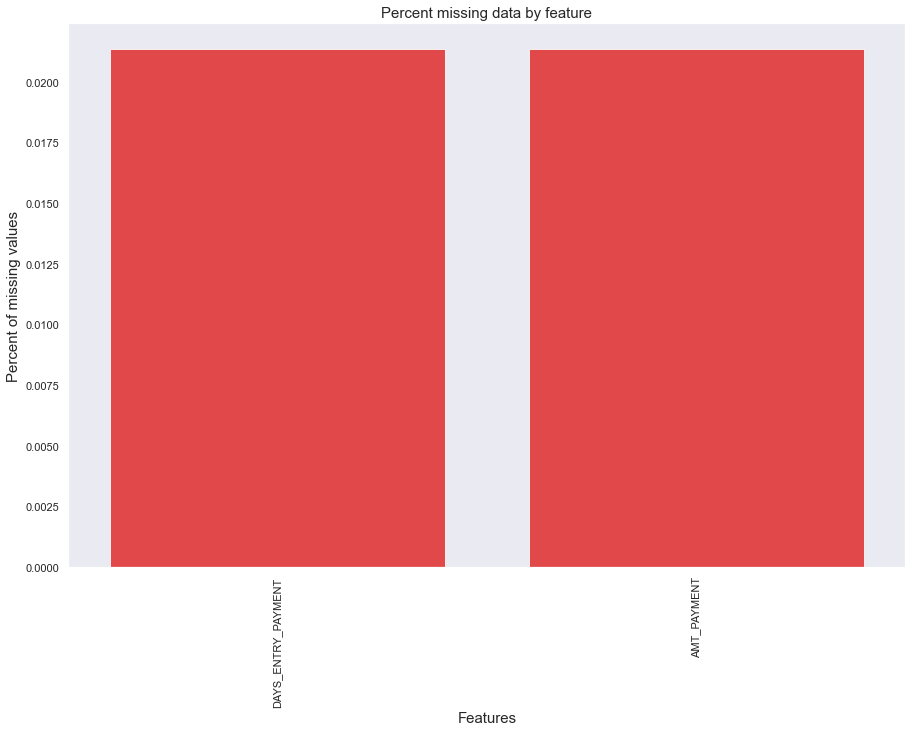

In [56]:
missingFeatures(datasets["installments_payments"])

##### Observation

Only 2 features have missing values. Both the columns have less than .2% missing data

# Lets Check if the Data is Balanced or Not

In [57]:
datasets['application_train'].TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

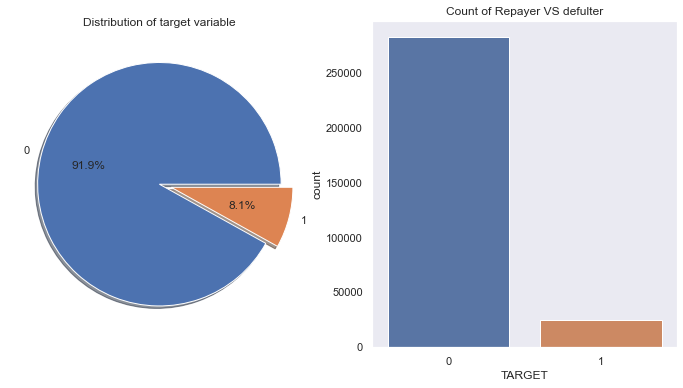

In [58]:
f,ax=plt.subplots(1,2,figsize=(12,6))
datasets['application_train'].TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=datasets['application_train'],ax=ax[1])
ax[1].set_title('Count of Repayer VS defulter')
plt.show()

We see that a large chunk of customers (about 92%) payed back on time and about 8% did not.This shows that the data is highly imbalanced. We need to choose a correct metric while evaluating our models, so that imbalnced data doesn't give us a false evaluation our model.

# Merging data and building Baseline model

## Removing Null Values from Aplication train

In [59]:
datasets['application_train']['NAME_FAMILY_STATUS'].fillna('NA', inplace=True)
datasets['application_train']['FLAG_EMP_PHONE'].fillna('NA', inplace=True)
datasets['application_train']['FLAG_CONT_MOBILE'].fillna('NA', inplace=True)
datasets['application_train']['FLAG_EMAIL'].fillna('NA', inplace=True)
datasets['application_train']['OCCUPATION_TYPE'].fillna('NA', inplace=True)

#Days Employed value for 1 row has been filled in wrong.         
datasets['application_train'].replace(max(datasets['application_train']['DAYS_EMPLOYED'].values), np.nan, inplace=True)
datasets['application_train']['CODE_GENDER'].replace('XNA','M',inplace=True)
datasets['application_train']['CNT_FAM_MEMBERS'].fillna(0,inplace=True)
datasets['application_train']['OCCUPATION_TYPE'].fillna('NA', inplace=True)
datasets['application_train']['EXT_SOURCE_1'].fillna(0, inplace=True)
datasets['application_train']['EXT_SOURCE_2'].fillna(0, inplace=True)
datasets['application_train']['EXT_SOURCE_3'].fillna(0, inplace=True)
datasets['application_train']['NAME_HOUSING_TYPE'].fillna('NA', inplace=True)
#There are a total of 4 applicants with Gender provided as 'XNA'
datasets['application_train']['AMT_ANNUITY'].fillna(0, inplace=True)
#A total of 36 datasets['application_train']points are there where Annuity Amount is null.
datasets['application_train']['AMT_GOODS_PRICE'].fillna(0, inplace=True)
#A total of 278 datasets['application_train']points are there where Annuity Amount is null.
datasets['application_train']['NAME_TYPE_SUITE'].fillna('NA', inplace=True)
datasets['application_train']['FLAG_MOBIL'].fillna('NA', inplace=True)

datasets['previous_application']['DAYS_TERMINATION'].replace(max(datasets['previous_application']['DAYS_TERMINATION'].values),np.nan, inplace=True)
datasets['application_train']= datasets['application_train'].drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)

# Feature Aggregation Class for Aggregation in Pipeline

In [60]:
class FeatureAggregator(BaseEstimator,TransformerMixin):
    def __init__(self,dataset,features):
        self.features=features
        self.dataset=dataset
        self.agg_ops=['min','max','mean','sum']
  
    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        result=X.groupby(['SK_ID_CURR']).agg(self.agg_ops)
        result.columns=["_".join(x) for x in result.columns.ravel()]
        result=result.reset_index(level=["SK_ID_CURR"])
        return result

## Merging Datasets together

#### Merging Credit Card Balance Dataset with Application Train|Test 

In [61]:
creditC_df=datasets['credit_card_balance']

#one hot encoding credit card data
creditC_df=ohe(creditC_df)


creditC_features=["MONTHS_BALANCE","AMT_BALANCE","CNT_INSTALMENT_MATURE_CUM"]
creditC_df = creditC_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
creditC_bal_pipeline=Pipeline([
                 ("creditC_aggregator",FeatureAggregator(creditC_df,creditC_features))
])

creditC_bal_agg=creditC_bal_pipeline.transform(creditC_df)
creditC_df=creditC_df.merge(creditC_bal_agg,how='left',on=['SK_ID_CURR'])
rename(creditC_df,"creditC")

creditC_df.shape

(103558, 141)

In [62]:
creditC_df['SK_ID_CURR'].nunique()

103558

## Merging POS_CASH_Balance Dataset with Application Train|Test

In [63]:
pos_cash_df=datasets['POS_CASH_balance']

#One hot encoding
pos_cash_df=ohe(pos_cash_df)

pos_cash_features=['SK_DPD_DEF','SK_DPD','MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']
pos_cash_df=pos_cash_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
pos_cash_pipeline=Pipeline([
                 ("pos_cash_cash_aggregator",FeatureAggregator(pos_cash_df,pos_cash_features))
])

pos_cash_agg=pos_cash_pipeline.transform(pos_cash_df)
pos_cash_df=pos_cash_df.merge(pos_cash_agg,how='left',on=['SK_ID_CURR'])
rename(pos_cash_df,"pos_cash")

pos_cash_df.shape

(337252, 76)

In [64]:
pos_cash_df['SK_ID_CURR'].nunique()

337252

### Preparing Installment Paymets for Merging


In [65]:
ins_pay_df=datasets['installments_payments']

#onehot encoding
ins_pay_df=ohe(ins_pay_df)

ins_pay_features=['AMT_INSTALMENT','DAYS_ENTRY_PAYMENT','AMT_PAYMENT']
ins_pay_df=ins_pay_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")
ins_pay_pipeline=Pipeline([
                           ("ins_pay_aggregator",FeatureAggregator(ins_pay_df,ins_pay_features))
])

ins_pay_agg=ins_pay_pipeline.transform(ins_pay_df)
ins_pay_df=ins_pay_df.merge(ins_pay_agg,how='left',on=['SK_ID_CURR'])
rename(ins_pay_df,"ins_pay")

ins_pay_df.shape

(339587, 36)

### Preparing Bureau and Bureau Balance for merging

In [66]:
bur_df=datasets['bureau']

#onehot encoding
bur_df=ohe(bur_df)
bur_df2=bur_df[['SK_ID_CURR']]
bur_df2['appcount']=1
bur_df2=bur_df2.groupby(['SK_ID_CURR'],as_index=False).agg("sum")
bur_features=["AMT_ANNUITY","AMT_CREDIT_SUM","AMT_CREDIT_SUM_DEBT","AMT_CREDIT_SUM_OVERDUE","AMT_CREDIT_SUM_LIMIT","CNT_CREDIT_PROLONG","DAYS_CREDIT_UPDATE","DAYS_CREDIT_ENDDATE","CREDIT_DAY_OVERDUE","AMT_CREDIT_MAX_OVERDUE","DAYS_CREDIT"]
bur_df=bur_df.groupby(["SK_ID_CURR"],as_index=False).agg("mean")

bur_pipeline=Pipeline([
                       ('bur_aggregator',FeatureAggregator(bur_df,bur_features))
                       ])


bur_agg=bur_pipeline.transform(bur_df)
bur_df=bur_df.merge(bur_agg,how='left',on='SK_ID_CURR')
rename(bur_df,"bur")
bur_df=bur_df.merge(bur_df2,how="left",on="SK_ID_CURR")

bur_df.shape

(305811, 182)

In [67]:
bur_bal_df=datasets['bureau_balance']

#onehot encoding
bur_bal_df=ohe(bur_bal_df)

bur_bal_features=["MONTHS_BALANCE"]
bur_bal_df=bur_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg("mean")
bur_bal_df=bur_bal_df.groupby(["SK_ID_BUREAU"],as_index=False).agg({f"{feature}":["min","max","mean","sum"] for feature in ["MONTHS_BALANCE"]})
bur_bal_df.columns=["_".join(x) for x in bur_bal_df.columns.ravel()]
bur_bal_df.columns=pd.Index(['bur_bal_'+col for col in list(bur_bal_df.columns)])


bur_bal_df.rename(columns={"bur_bal_SK_ID_BUREAU_":"SK_ID_BUREAU"},inplace=True)
bur_bal_df.rename(columns={"SK_ID_BUREAU":"SK_ID_CURR"},inplace=True)
bur_df.shape

(305811, 182)

In [68]:
bur_df=bur_df.merge(bur_bal_df,how='left',on='SK_ID_CURR')
bur_df.shape

(305811, 186)

### Preparing Application Dataset for merging 

In [69]:
prev_app_df=datasets['previous_application']

#onehot encoding
prev_app_df=ohe(prev_app_df)

prev_app_features=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','CNT_PAYMENT','DAYS_DECISION','HOUR_APPR_PROCESS_START','RATE_DOWN_PAYMENT']
prev_app_df=prev_app_df.groupby(["SK_ID_CURR"],as_index=False).agg('mean')
prev_app_pipeline=Pipeline([
("prev_app_aggregator",FeatureAggregator(prev_app_df,prev_app_features))
])

prev_app_agg=prev_app_pipeline.transform(prev_app_df)
prev_app_df=prev_app_df.merge(prev_app_agg,how='left',on=['SK_ID_CURR'])
rename(prev_app_df,"pa")

prev_app_df.shape

(338857, 816)

In [70]:
prev_app_df['SK_ID_CURR'].nunique()

338857

## Merging all Sub-dataframes together

In [71]:
app_df=datasets['application_train']
app_test_df=datasets['application_test']


app_df=app_df.merge(bur_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(bur_df,how='left',on='SK_ID_CURR')


app_df=app_df.merge(prev_app_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(prev_app_df,how='left',on='SK_ID_CURR')


app_df=app_df.merge(creditC_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(creditC_df,how='left',on='SK_ID_CURR')

app_df=app_df.merge(ins_pay_df,how='left',on="SK_ID_CURR")
app_test_df=app_test_df.merge(ins_pay_df,how='left',on='SK_ID_CURR')

app_df=app_df.merge(pos_cash_df,how='left',on='SK_ID_CURR')
app_test_df=app_test_df.merge(pos_cash_df,how='left',on='SK_ID_CURR')

In [72]:
%%time
print("Optimizing memory After Merging")
app_test_df=optimize_memory(app_test_df)
app_df=optimize_memory(app_df)

Optimizing memory After Merging
Before Optimization : DataFrame Memory 430.5524139404297
After Optimization : DataFrame Memory 148.1040802001953
Before Optimization : DataFrame Memory 2713.2909507751465
After Optimization : DataFrame Memory 928.4780750274658
CPU times: user 1min 11s, sys: 4min 40s, total: 5min 52s
Wall time: 8min 14s


# Saving final dataframe 

In [73]:
import pickle
print("SAVING: trainig dataframe.....")
with open('app_df.pkl', 'wb') as file:
    pickle.dump(app_df, file)
    
print("SAVED: trainig dataframe")
  
print("SAVING: test dataframe.....")
with open('app_test_df.pkl', 'wb') as file:
    pickle.dump(app_test_df, file)
print("SAVED: test dataframe")

SAVING: trainig dataframe.....
SAVED: trainig dataframe
SAVING: test dataframe.....
SAVED: test dataframe


## Finding Correlation between Merged data and Target feature.

In [74]:
# %%time
# correlations=np.abs(app_df.corr()['TARGET'])

### Seperating categorical and numerical features

In [75]:
numerical_feat=list(app_df.loc[:, ~app_df.columns.isin(['TARGET'])]._get_numeric_data().columns)
print("number of numerical features: ", len(numerical_feat))


categorical_feat=list(app_df.select_dtypes(include="object").columns.values)
print("number of categorical features: ", len(categorical_feat))

number of numerical features:  1336
number of categorical features:  16


## Top50 numerical features which are highly correlated to the Target feature.

In [76]:
# corr_num=np.abs(app_df.loc[:, app_df.columns.isin(numerical_feat)].corr()['TARGET']).sort_values(ascending=False)

# trainer_data=pd.read_pickle("app_df.pkl")

# numvar_top50=list(corr_num.index[1:51])
# corr_num=np.abs(trainer_data.loc[:, trainer_data.columns.isin(numvar_top50+['TARGET'])].corr()['TARGET']).sort_values(ascending=False)
# corr_num

## Top50 categorical features which are highly correlated to the Target feature.

In [77]:
# cat_corr_num=np.abs(app_df.loc[:, app_df.columns.isin(categorical_feat)].corr()['TARGET']).sort_values(ascending=False)

# trainer_data=pd.read_pickle("app_df.pkl")

# catvar_top50=list(corr_num.index[1:51])
# cat_corr_num=np.abs(trainer_data.loc[:, trainer_data.columns.isin(catvar_top50+['TARGET'])].corr()['TARGET']).sort_values(ascending=False)
# cat_corr_num

### Separting train and test data

In [78]:
selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

X=app_df.drop(['TARGET'],axis=1)
y=app_df['TARGET']
X_kaggle_test= datasets["application_test"][selected_features]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_valid.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (222176, 1352)
Test data shape:  (46127, 1352)
Test data shape:  (39208, 1352)


# Pipleine

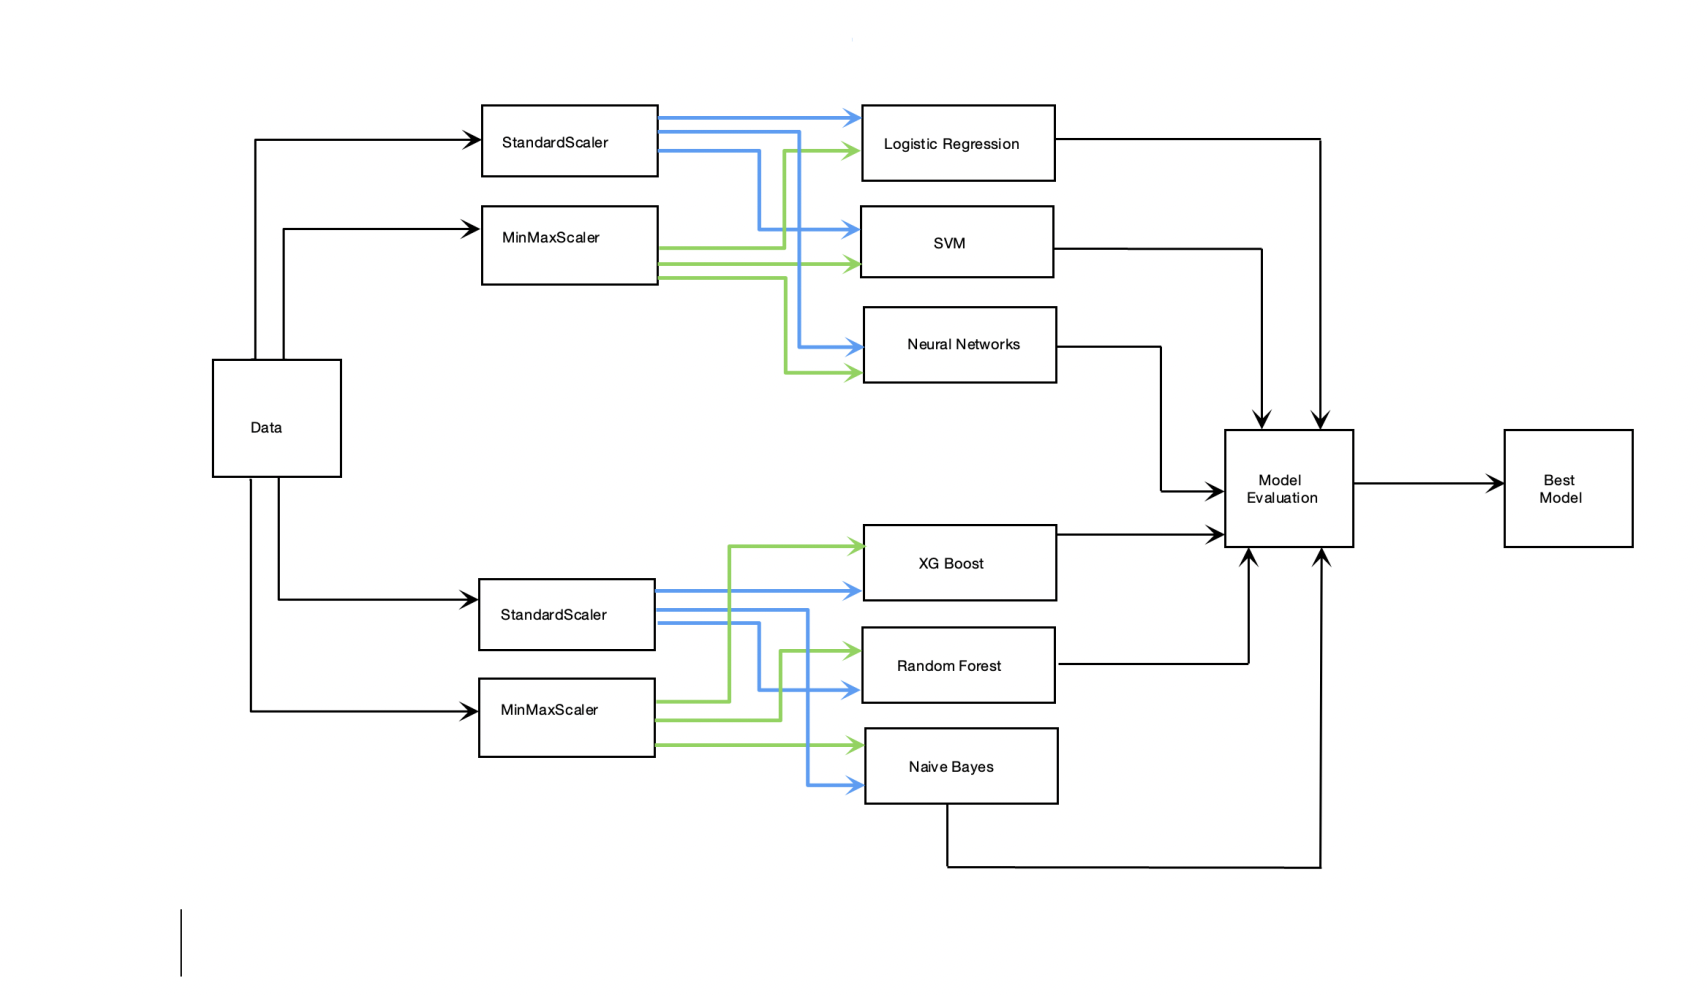

We will use pipeline to prepare our data for the predictions.

Pipleines consist of:

1. custom DataFrameSelector which slelcts the given features

2. Imputer for imputing missing values

3. MinMax scaler for bringing all the values on the same scale.

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

#custom dataframeSelector for preparing numerical and categorical pipelines
class DataFrameSelector(BaseEstimator, TransformerMixin):
#     initialize with given feratuere names
    def __init__(self, feature_name):
        self.feature_name = feature_name
        
    #fit function that will return the object
    def fit(self, X, y=None):
        return self
    
    #Trnasform function that will return the requested features
    def transform(self, X):
        return X[self.feature_name].values

    
#pipeline for preparing numerical features
numerical_pipeline = Pipeline([
        ('selector', DataFrameSelector(numerical_feat)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('min_max_scaler', MinMaxScaler()),
    ])


#Pipoeline for preparing categorical features
catagorical_pipeline = Pipeline([
        ('selector', DataFrameSelector(categorical_feat)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


#Pipeline combining numerical and categorical pipelines
data_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("catagorical_pipeline", catagorical_pipeline),
    ])
           


#### Creating the full pipeline with data preparation and base classifier

## 1. Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB

np.random.seed(42)

#Creating full pipeline
full_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("MNB", MultinomialNB())
    ])
model = full_pipeline.fit(X_train, y_train)

In [81]:
y_pred = model.predict(X_train)

print("Acuracy is : ",np.round(accuracy_score(y_train, y_pred), 3))
print("ROC is : ",np.round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),3))
print("F1 score is : ",np.round(f1_score(y_train, y_pred,average='weighted'), 3))
print("Precision is : ",np.round(precision_score(y_train, y_pred), 3))
print("Recall is : ",np.round(recall_score(y_train, y_pred), 3))
print("Log loss is : ",np.round(log_loss(y_train, y_pred), 3))

Acuracy is :  0.8
ROC is :  0.652
F1 score is :  0.832
Precision is :  0.16
Recall is :  0.352
Log loss is :  6.922


### Logging results

In [82]:
data = {'Model': [],
       'Accuracy': [],
       'ROC_AUC': [],
       'F1-Score': [],
       'Precision': [],
       'Recall': [],
       'Log-Loss': []}

model_score = pd.DataFrame(data)

In [83]:
y_pred = model.predict(X_test)

model_score.loc[len(model_score)] = ["(Base)Naive Bayes",
                                    np.round(accuracy_score(y_test, y_pred), 3),
                                     np.round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3),
                                     np.round(f1_score(y_test, y_pred,average='weighted'), 3),
                                     np.round(precision_score(y_test, y_pred), 3),
                                     np.round(recall_score(y_test, y_pred), 3),
                                     np.round(log_loss(y_test, y_pred), 3)
                                    
                                    ]

model_score

Model  Accuracy  ROC_AUC  F1-Score  Precision  Recall  Log-Loss
0  (Base)Naive Bayes     0.799    0.652     0.829      0.164    0.34     6.945

## Plotting ROC Curve

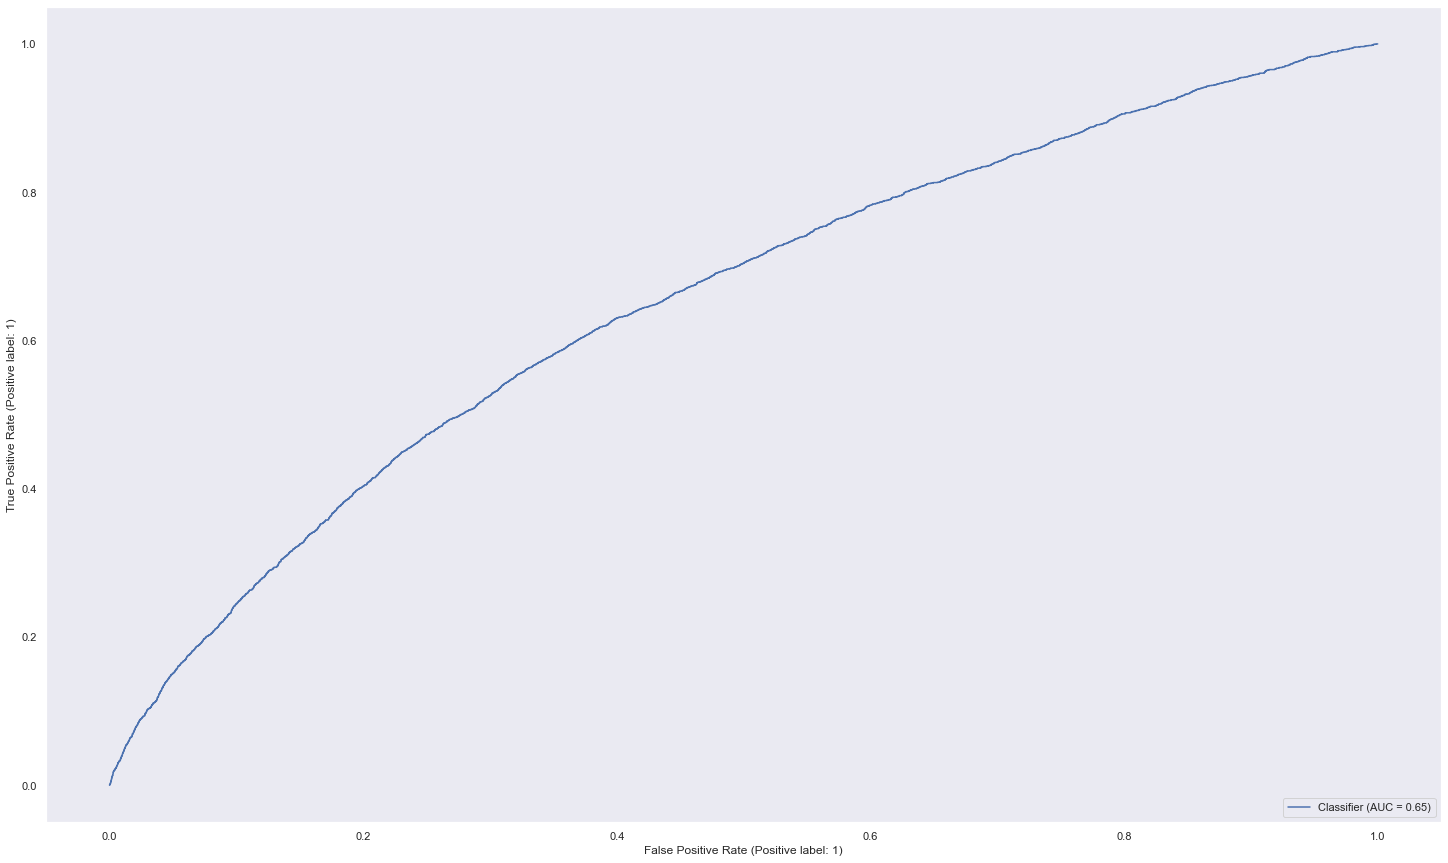

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:, 1])
plt.show()


### Confusion matrix for testing data

<Figure size 1800x1080 with 0 Axes>

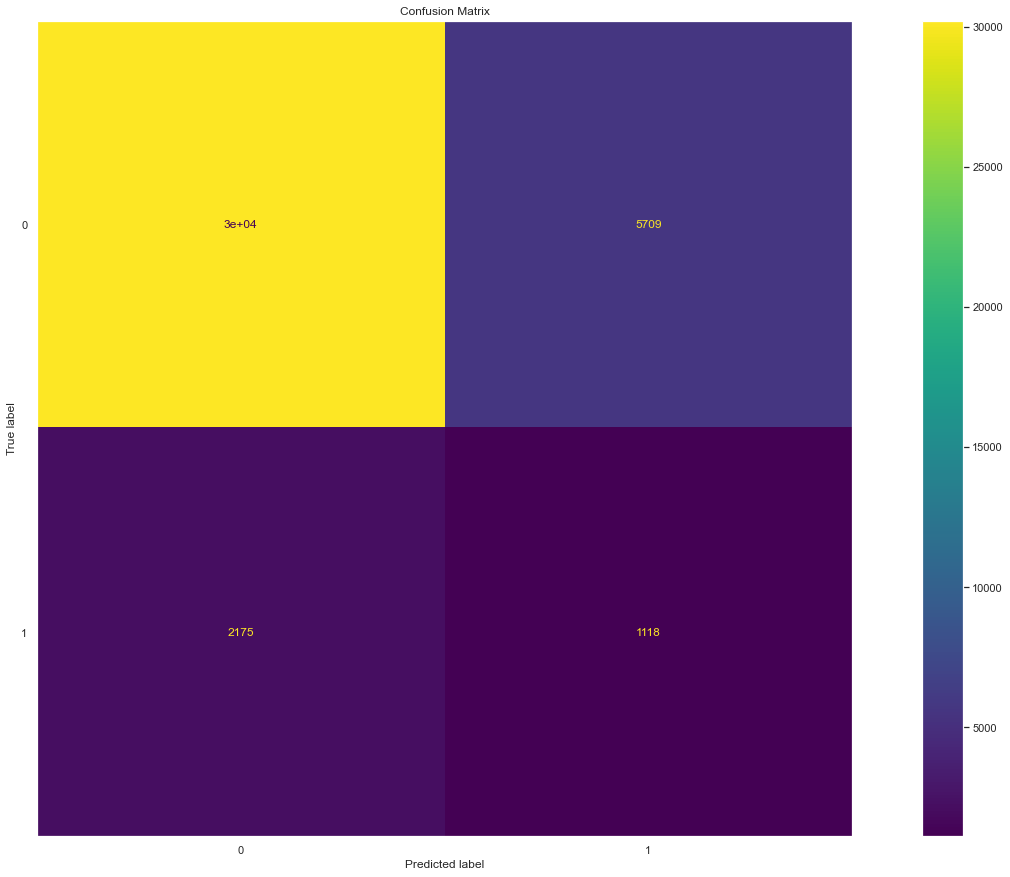

In [85]:
from sklearn.metrics import plot_confusion_matrix
plt.clf()
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [86]:
from sklearn.naive_bayes import MultinomialNB

np.random.seed(42)

#Creating full pipeline
full_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline.fit(X_train, y_train)

In [87]:
y_pred = model.predict(X_train)

print("Acuracy is : ",np.round(accuracy_score(y_train, y_pred), 3))
print("ROC is : ",np.round(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),3))
print("F1 score is : ",np.round(f1_score(y_train, y_pred,average='weighted'), 3))
print("Precision is : ",np.round(precision_score(y_train, y_pred), 3))
print("Recall is : ",np.round(recall_score(y_train, y_pred), 3))
print("Log loss is : ",np.round(log_loss(y_train, y_pred), 3))

Acuracy is :  0.92
ROC is :  0.756
F1 score is :  0.884
Precision is :  0.552
Recall is :  0.017
Log loss is :  2.761


In [88]:

y_pred = model.predict(X_test)
model_score.loc[len(model_score)] = ["(Base)Logistic Regression",
                                    np.round(accuracy_score(y_test, y_pred), 3),
                                     np.round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),3),
                                     np.round(f1_score(y_test, y_pred,average='weighted'), 3),
                                     np.round(precision_score(y_test, y_pred), 3),
                                     np.round(recall_score(y_test, y_pred), 3),
                                     np.round(log_loss(y_test, y_pred), 3)
                                    
                                    ]

model_score

Model  Accuracy  ROC_AUC  F1-Score  Precision  Recall  \
0          (Base)Naive Bayes     0.799    0.652     0.829      0.164   0.340   
1  (Base)Logistic Regression     0.916    0.758     0.878      0.525   0.016   

   Log-Loss  
0     6.945  
1     2.896

## Plotting ROC Curve

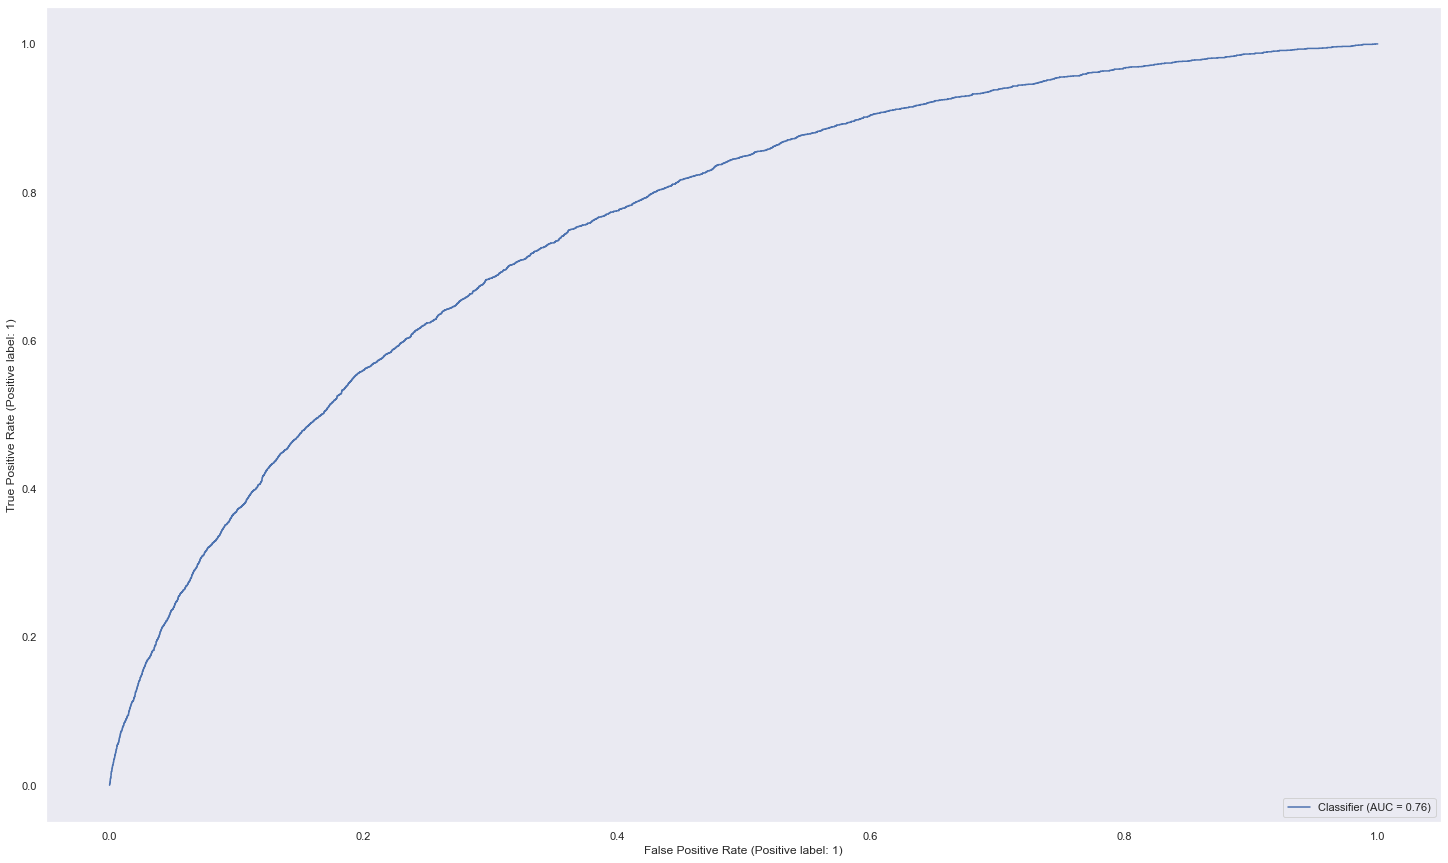

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test)[:, 1])
plt.show()


### Confusion matrix for testing data

<Figure size 1800x1080 with 0 Axes>

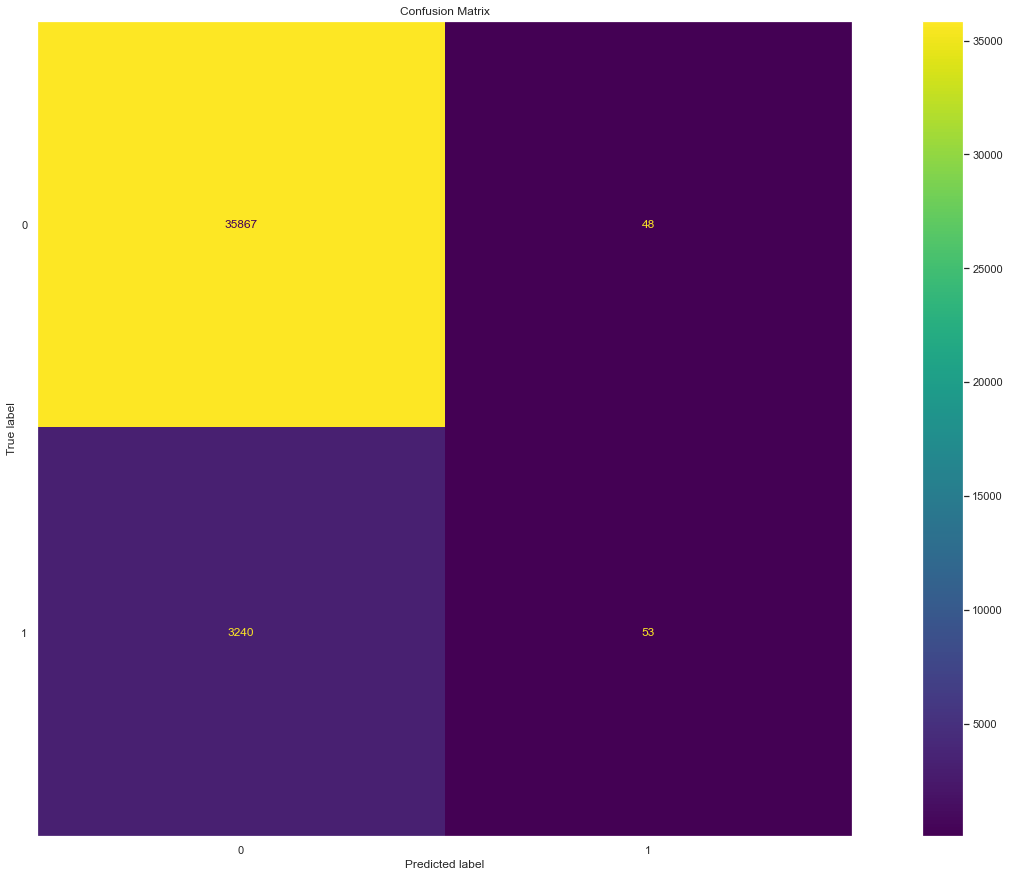

In [90]:
from sklearn.metrics import plot_confusion_matrix
plt.clf()
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

## Result Analysis

As we can see from the result log above logistic regression performed better than Naive bayes. So we'll go ahead and submit the logistic regression model as our baseline model on Kaggle.

# Results and Discussion

Before merging our datasets in order to build the baseline model we observe that a large chunk of customers (about 92%) payed back on time and about 8% did not.This shows that the data is highly imbalanced. Thereby,it becomes important for us to select the most important accuracy metric. We have used several accuracy metrics namely Logloss,F1-Score,ROC-AUC among others.F1 score is the best metric among these as it doesn't depend upon the balancing nature (i.e. whether the data is balanced or imbalanced) of the data. Additionally F1 score observes both recall and precision at the same time.Yet for the current phase we have used ROC-AUC score(since the Kaggle submission requires ROC-AUC score) to calcualte the accuracy of our baseline models which are Logistic Regression and Naive Bayes. The accuracy for both of these are 75% and 65% respectively. Therefore, we choose Logistic Regression as our Baseline model for the upcoming phases.

From the above performed Exploratory Data Analysis in our next phase we will perform feature engineering to create some new features which highly correlates with the target variable.

# Conclusion

The main aim of our project is to predict the likelihood of loan repayment for people who are seeking to buy home.A good credit rating increases the chances of approval for all the above-mentioned scenarios. Still, in many cases, we see that the customers tend to not have a credit rating which makes them less competitive in loan approval. Thereby, in our project, we will address all the factors which are important for an individual to acquire a loan some of which are monthly income, previous loan applications, previous loan history, and loan repayment history among others.

The Kaggle competition was started with the hypothesis that machine learning can be used to mine through the large amount of data and features to accurately predict whether a buyer should be approved or not.In this phase our team has completed EDA, preliminary feature engineering, and selected the baseline model among two different machine learning pipeline namely Logistic Regression and Naive Bayes. Logistic Regression having the highest accuracy of 75% is chosen as the baseline model.In the upcoming phases we will perform feature engineering alongwith hyperparameter tuning to get the best results.

# Kaggle Submission

In [91]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()
submit_df.to_csv("submission.csv",index=False)

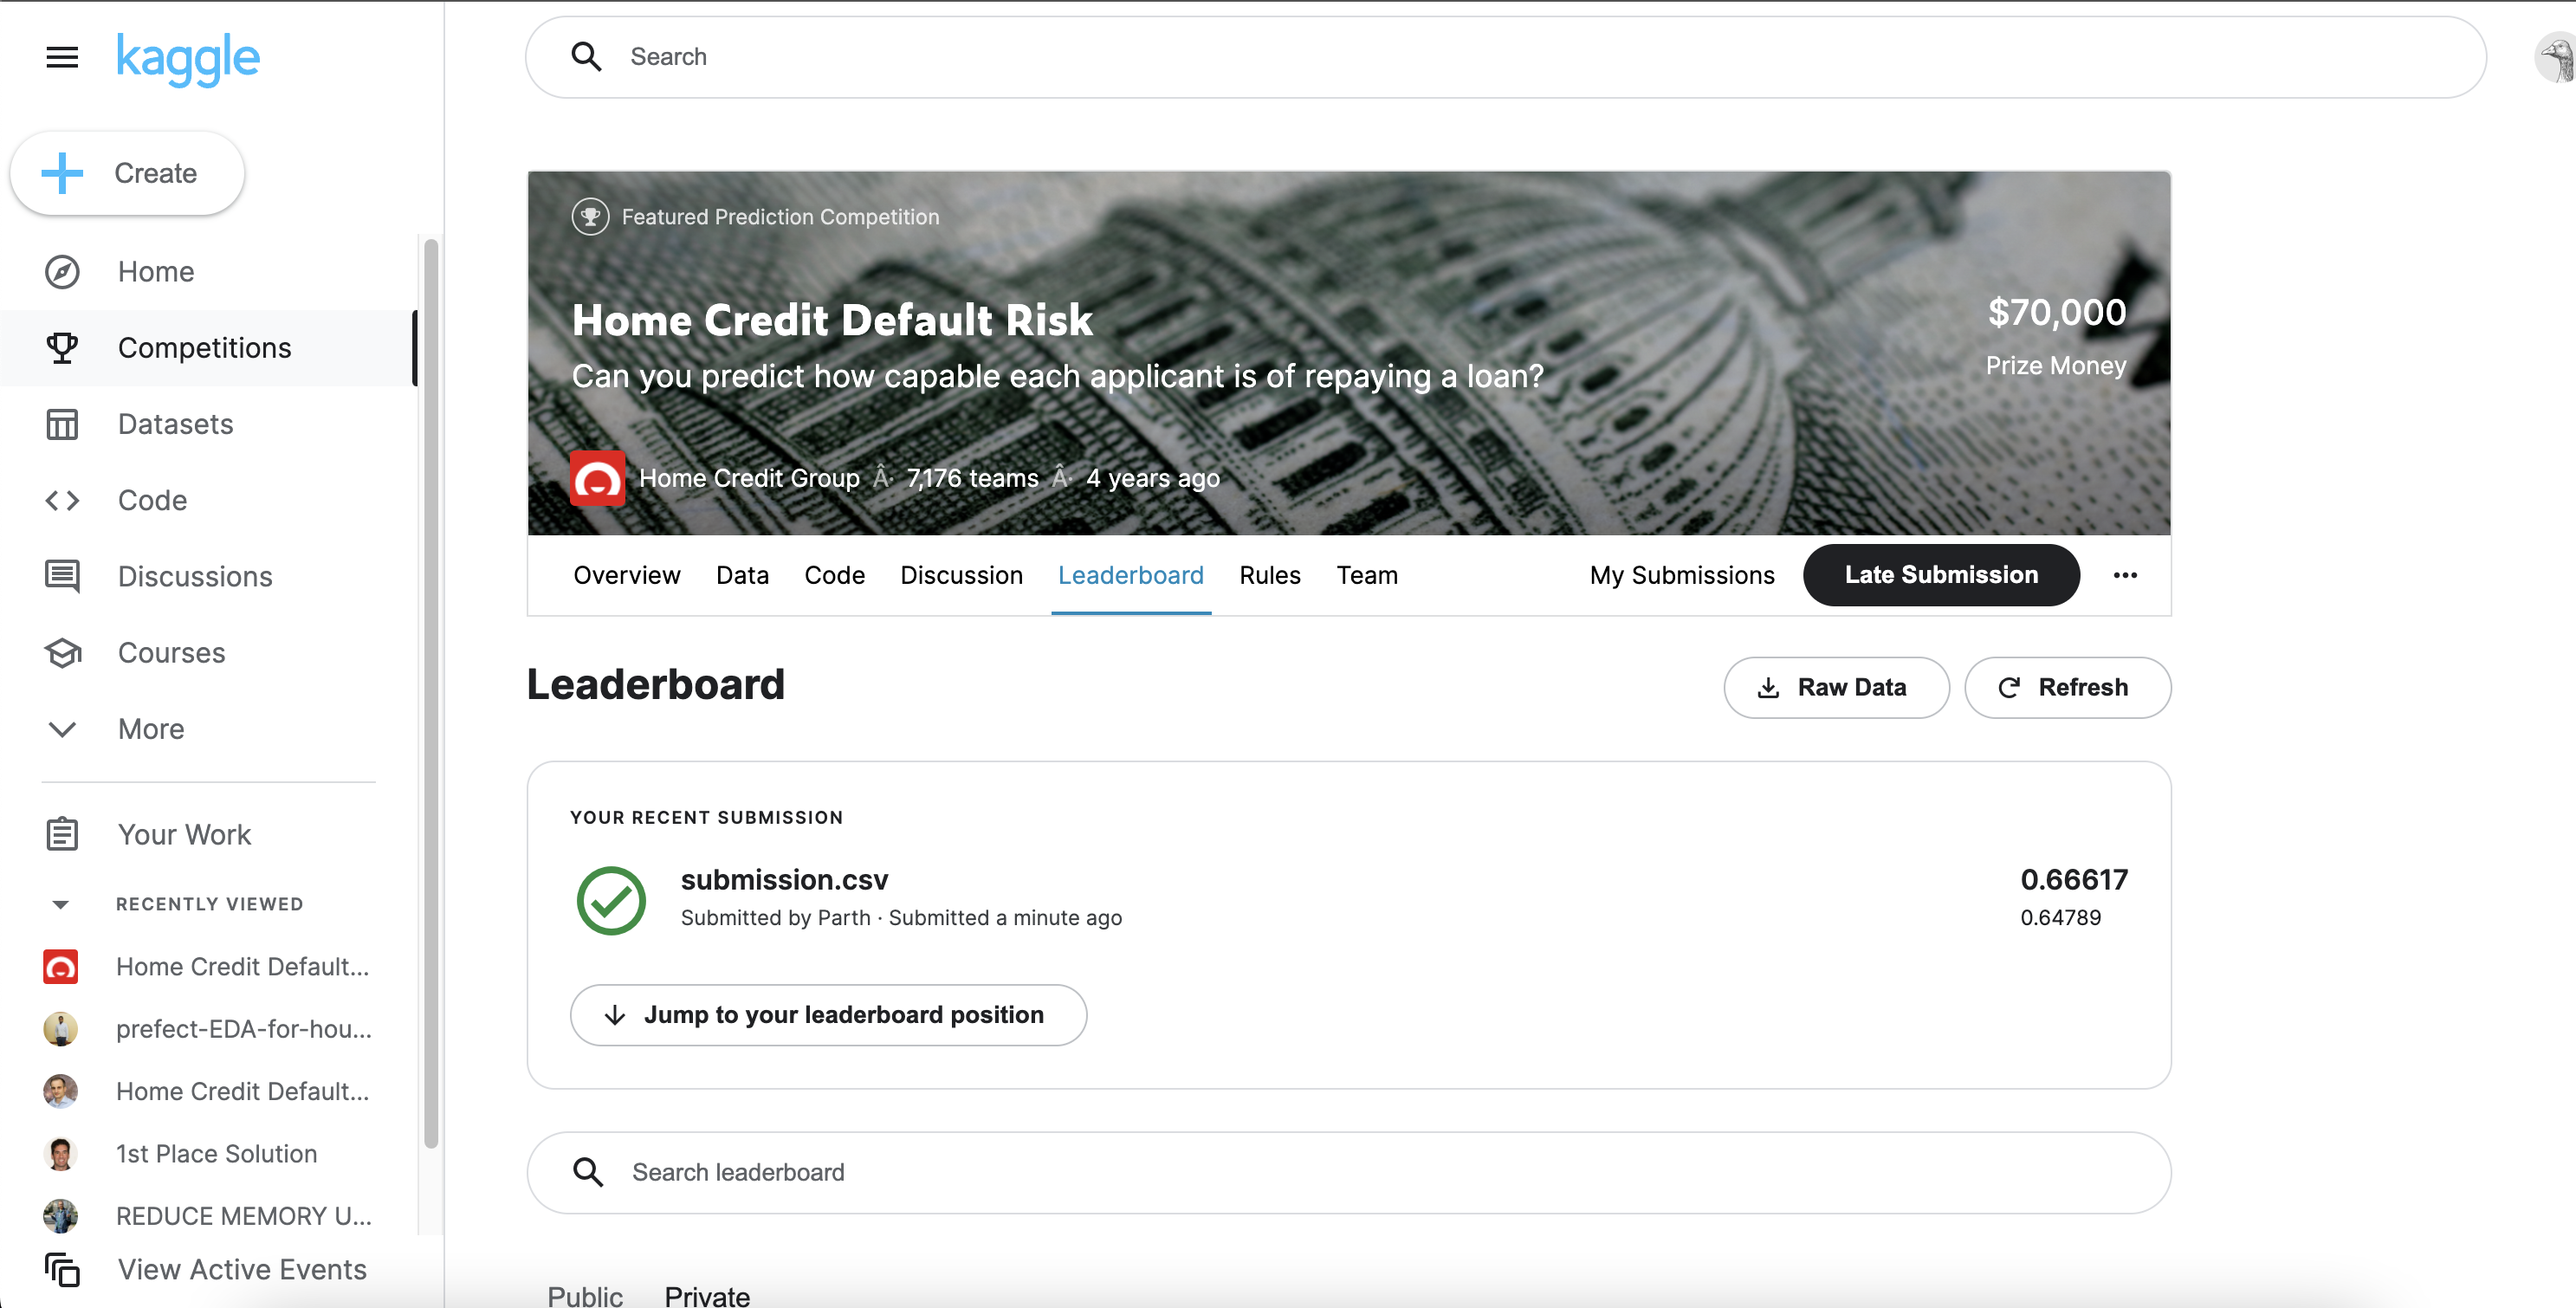